##### Importando Bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

In [2]:
df = pd.read_csv('brasileirao.csv')

In [3]:
df

,Posição,Time,PTS,Estado,J,V,E,D,GP,GC,SG,CA,CV,%,Ano,Serie,Serie_Anterior,Peso
0,1º,Cruzeiro,76,MG,38,23,7,8,77,37,40,73,4,66,2013,A,A,1.0
1,2º,Grêmio,65,RS,38,18,11,9,42,35,7,79,6,57,2013,A,A,1.0
2,3º,Athletico Paranaense,64,PR,38,18,10,10,65,49,16,92,5,56,2013,A,B,0.7
3,4º,Botafogo,61,RJ,38,17,10,11,55,41,14,82,3,53,2013,A,A,1.0
4,5º,Vitória,59,BA,38,16,11,11,59,53,6,67,1,51,2013,A,B,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,16º,Chapecoense,9,SC,9,2,3,4,13,12,1,34,0,33,2023,B,B,0.7
436,17º,Avaí,8,SC,9,2,2,5,5,15,-10,31,4,29,2023,B,A,1.0
437,18º,Tombense,5,MG,9,1,2,6,7,13,-6,23,2,18,2023,B,B,0.7
438,19º,Crb,5,AL,8,1,2,5,4,11,-7,24,3,20,2023,B,B,0.7


In [4]:
dfn = df[df['Ano'] != 2023]
dfn

,Posição,Time,PTS,Estado,J,V,E,D,GP,GC,SG,CA,CV,%,Ano,Serie,Serie_Anterior,Peso
0,1º,Cruzeiro,76,MG,38,23,7,8,77,37,40,73,4,66,2013,A,A,1.0
1,2º,Grêmio,65,RS,38,18,11,9,42,35,7,79,6,57,2013,A,A,1.0
2,3º,Athletico Paranaense,64,PR,38,18,10,10,65,49,16,92,5,56,2013,A,B,0.7
3,4º,Botafogo,61,RJ,38,17,10,11,55,41,14,82,3,53,2013,A,A,1.0
4,5º,Vitória,59,BA,38,16,11,11,59,53,6,67,1,51,2013,A,B,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,16º,Novorizontino,44,SP,38,11,11,16,44,49,-5,108,5,38,2022,B,C,0.5
396,17º,Csa,42,AL,38,9,15,14,29,37,-8,88,8,36,2022,B,B,0.7
397,18º,Brusque,34,SC,38,8,10,20,21,38,-17,88,7,29,2022,B,B,0.7
398,19º,Operário,34,PR,38,7,13,18,31,53,-22,81,6,29,2022,B,B,0.7


##### Começando a Análise

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Posição         440 non-null    object 
 1   Time            440 non-null    object 
 2   PTS             440 non-null    int64  
 3   Estado          440 non-null    object 
 4   J               440 non-null    int64  
 5   V               440 non-null    int64  
 6   E               440 non-null    int64  
 7   D               440 non-null    int64  
 8   GP              440 non-null    int64  
 9   GC              440 non-null    int64  
 10  SG              440 non-null    int64  
 11  CA              440 non-null    int64  
 12  CV              440 non-null    int64  
 13  %               440 non-null    int64  
 14  Ano             440 non-null    int64  
 15  Serie           440 non-null    object 
 16  Serie_Anterior  440 non-null    object 
 17  Peso            440 non-null    flo

##### Corrigindo Dados

In [6]:
df["Posição"] = df["Posição"].str.replace("º", "")
df["Posição"] = pd.to_numeric(df["Posição"], errors="coerce")

In [7]:
df.describe()

,Posição,PTS,J,V,E,D,GP,GC,SG,CA,CV,%,Ano,Peso
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,10.500000,48.022727,35.309091,12.770455,9.763636,12.775000,40.784091,40.797727,-0.013636,84.836364,5.165909,44.950000,2018.000000,0.828636
std,5.772845,16.363174,8.520639,5.065362,3.740871,5.119689,13.887974,13.203937,15.024954,22.911348,2.847246,11.452477,3.165877,0.181108
min,1.000000,3.000000,7.000000,0.000000,0.000000,0.000000,4.000000,3.000000,-57.000000,9.000000,0.000000,12.000000,2013.000000,0.500000
25%,5.750000,41.000000,38.000000,10.000000,8.000000,10.000000,34.000000,35.000000,-9.000000,79.000000,3.000000,38.000000,2015.000000,0.700000
50%,10.500000,50.000000,38.000000,13.000000,10.000000,13.000000,42.000000,42.000000,0.000000,89.500000,5.000000,44.000000,2018.000000,0.850000
75%,15.250000,59.000000,38.000000,16.000000,12.000000,16.000000,49.000000,49.000000,9.000000,98.000000,7.000000,52.000000,2021.000000,1.000000
max,20.000000,90.000000,38.000000,28.000000,20.000000,28.000000,86.000000,79.000000,49.000000,128.000000,14.000000,87.000000,2023.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Posição         440 non-null    int64  
 1   Time            440 non-null    object 
 2   PTS             440 non-null    int64  
 3   Estado          440 non-null    object 
 4   J               440 non-null    int64  
 5   V               440 non-null    int64  
 6   E               440 non-null    int64  
 7   D               440 non-null    int64  
 8   GP              440 non-null    int64  
 9   GC              440 non-null    int64  
 10  SG              440 non-null    int64  
 11  CA              440 non-null    int64  
 12  CV              440 non-null    int64  
 13  %               440 non-null    int64  
 14  Ano             440 non-null    int64  
 15  Serie           440 non-null    object 
 16  Serie_Anterior  440 non-null    object 
 17  Peso            440 non-null    flo

##### Quantos Times por estado tem no dataset?

In [9]:
times_por_estado = dfn.groupby("Estado")["Time"].nunique()
print(times_por_estado)

Estado
 AL     3
 BA     2
 CE     3
 GO     3
 MA     2
 MG     9
 MT     2
 PA     2
 PE     3
 PR     8
 RJ     5
 RN     2
 RS     4
 SC     7
 SE     1
 SP    16
Name: Time, dtype: int64


##### Visualizando os Campeões das Séries A e B

In [10]:
serie_a_camp = df.loc[(df["Serie"] == "A") & (df["Posição"] == 1)]

print("Campeões da Série A:")
print(serie_a_camp)

Campeões da Série A:
     Posição              Time  PTS Estado   J   V   E  D  GP  GC  SG   CA  \
0          1          Cruzeiro   76     MG  38  23   7  8  77  37  40   73   
40         1          Cruzeiro   80     MG  38  24   8  6  67  38  29   70   
80         1       Corinthians   81     SP  38  24   9  5  71  31  40   64   
120        1         Palmeiras   80     SP  38  24   8  6  62  32  30   95   
160        1       Corinthians   72     SP  38  21   9  8  50  30  20   81   
200        1         Palmeiras   80     SP  38  23  11  4  64  26  38  117   
240        1          Flamengo   90     RJ  38  28   6  4  86  37  49   90   
280        1          Flamengo   71     RJ  38  21   8  9  68  48  20   90   
320        1  Atlético Mineiro   84     MG  38  26   6  6  67  34  33   82   
360        1         Palmeiras   81     SP  38  23  12  3  66  27  39   85   
400        1          Botafogo   21     RJ   8   7   0  1  16   6  10   20   

     CV   %   Ano Serie Serie_Anterior  Pe

In [11]:
serie_b_camp = df.loc[(df["Serie"] == "B") & (df["Posição"] == 1)]

print("Campeões da Série B:")
print(serie_b_camp)

Campeões da Série B:
     Posição                 Time  PTS Estado   J   V   E   D  GP  GC  SG  CA  \
20         1            Palmeiras   79     SP  38  24   7   7  71  28  43  81   
60         1            Joinville   70     SC  38  21   7  10  54  33  21  95   
100        1             Botafogo   72     RJ  38  21   9   8  60  30  30  69   
140        1             Atlético   76     GO  38  22  10   6  60  35  25  85   
180        1              América   73     MG  38  20  13   5  46  25  21  63   
220        1            Fortaleza   71     CE  38  21   8   9  54  33  21  95   
260        1  Red Bull Bragantino   75     SP  38  22   9   7  64  27  37  79   
300        1          Chapecoense   73     SC  38  20  13   5  42  21  21  97   
340        1             Botafogo   70     RJ  38  20  10   8  56  31  25  71   
380        1             Cruzeiro   78     MG  38  23   9   6  57  26  31  80   
420        1              Vitória   19     BA   9   6   1   2  17   6  11  17   

     C

##### Analisando Pontos

In [12]:
df['PTS'].mean()

48.02272727272727

In [13]:
times_serie_a_2023 = df[(df['Serie'] == 'A') & (df['Ano'] == 2023)]['Time'].unique()

filtro = (df['Time'].isin(times_serie_a_2023)) & (df['Serie'] == 'A') & (df['Ano'] < 2023)
media_times= df[filtro].groupby('Time')['PTS'].mean().sort_values(ascending=False)

for time, media in media_times.items():
    print("Time:", time)
    print("Média de Pontos em Anos Anteriores (Série A):", media)
    print("---")

Time: Palmeiras
Média de Pontos em Anos Anteriores (Série A): 66.11111111111111
---
Time: Flamengo
Média de Pontos em Anos Anteriores (Série A): 63.9
---
Time: Atlético Mineiro
Média de Pontos em Anos Anteriores (Série A): 62.1
---
Time: Grêmio
Média de Pontos em Anos Anteriores (Série A): 60.22222222222222
---
Time: Corinthians
Média de Pontos em Anos Anteriores (Série A): 60.0
---
Time: Internacional
Média de Pontos em Anos Anteriores (Série A): 59.666666666666664
---
Time: Cruzeiro
Média de Pontos em Anos Anteriores (Série A): 58.285714285714285
---
Time: São Paulo
Média de Pontos em Anos Anteriores (Série A): 57.8
---
Time: Santos
Média de Pontos em Anos Anteriores (Série A): 57.7
---
Time: Athletico Paranaense
Média de Pontos em Anos Anteriores (Série A): 57.166666666666664
---
Time: América Fc
Média de Pontos em Anos Anteriores (Série A): 53.0
---
Time: Fluminense
Média de Pontos em Anos Anteriores (Série A): 53.0
---
Time: Fortaleza
Média de Pontos em Anos Anteriores (Série A): 

In [14]:
times_serie_b_2023 = df[(df['Serie'] == 'B') & (df['Ano'] == 2023)]['Time'].unique()

filtro = (df['Time'].isin(times_serie_b_2023)) & (df['Serie'] == 'B') & (df['Ano'] < 2023)
media_times= df[filtro].groupby('Time')['PTS'].mean().sort_values(ascending=False)

for time, media in media_times.items():
    print("Time:", time)
    print("Média de Pontos em Anos Anteriores (Série B):", media)
    print("---")

Time: Chapecoense
Média de Pontos em Anos Anteriores (Série B): 63.333333333333336
---
Time: Sport
Média de Pontos em Anos Anteriores (Série B): 62.666666666666664
---
Time: Avaí
Média de Pontos em Anos Anteriores (Série B): 60.666666666666664
---
Time: Atlético
Média de Pontos em Anos Anteriores (Série B): 57.666666666666664
---
Time: Ituano
Média de Pontos em Anos Anteriores (Série B): 57.0
---
Time: Botafogo
Média de Pontos em Anos Anteriores (Série B): 56.5
---
Time: Ceará
Média de Pontos em Anos Anteriores (Série B): 56.4
---
Time: Ponte Preta
Média de Pontos em Anos Anteriores (Série B): 55.166666666666664
---
Time: Crb
Média de Pontos em Anos Anteriores (Série B): 52.75
---
Time: Sampaio Corrêa
Média de Pontos em Anos Anteriores (Série B): 52.5
---
Time: Londrina
Média de Pontos em Anos Anteriores (Série B): 52.166666666666664
---
Time: Guarani
Média de Pontos em Anos Anteriores (Série B): 50.166666666666664
---
Time: Vitória
Média de Pontos em Anos Anteriores (Série B): 49.75
-

In [15]:
df['PTS'].median()

50.0

In [16]:
times_serie_a_2023 = df[(df['Serie'] == 'A') & (df['Ano'] == 2023)]['Time'].unique()

filtro = (df['Time'].isin(times_serie_a_2023)) & (df['Serie'] == 'A') & (df['Ano'] < 2023)
mediana_times= df[filtro].groupby('Time')['PTS'].median().sort_values(ascending=False)

for time, mediana in mediana_times.items():
    print("Time:", time)
    print("Mediana de Pontos em Anos Anteriores (Série A):", mediana)
    print("---")

Time: Flamengo
Mediana de Pontos em Anos Anteriores (Série A): 66.5
---
Time: Palmeiras
Mediana de Pontos em Anos Anteriores (Série A): 66.0
---
Time: Grêmio
Mediana de Pontos em Anos Anteriores (Série A): 62.0
---
Time: Atlético Mineiro
Mediana de Pontos em Anos Anteriores (Série A): 60.5
---
Time: Internacional
Mediana de Pontos em Anos Anteriores (Série A): 60.0
---
Time: São Paulo
Mediana de Pontos em Anos Anteriores (Série A): 58.0
---
Time: Athletico Paranaense
Mediana de Pontos em Anos Anteriores (Série A): 57.5
---
Time: Corinthians
Mediana de Pontos em Anos Anteriores (Série A): 56.5
---
Time: Santos
Mediana de Pontos em Anos Anteriores (Série A): 55.5
---
Time: Cruzeiro
Mediana de Pontos em Anos Anteriores (Série A): 55.0
---
Time: Fortaleza
Mediana de Pontos em Anos Anteriores (Série A): 54.0
---
Time: América Fc
Mediana de Pontos em Anos Anteriores (Série A): 53.0
---
Time: Red Bull Bragantino
Mediana de Pontos em Anos Anteriores (Série A): 53.0
---
Time: Botafogo
Mediana d

In [17]:
times_serie_b_2023 = df[(df['Serie'] == 'B') & (df['Ano'] == 2023)]['Time'].unique()

filtro = (df['Time'].isin(times_serie_b_2023)) & (df['Serie'] == 'B') & (df['Ano'] < 2023)
mediana_times= df[filtro].groupby('Time')['PTS'].median().sort_values(ascending=False)

for time, mediana in mediana_times.items():
    print("Time:", time)
    print("Mediana de Pontos em Anos Anteriores (Série B):", mediana)
    print("---")

Time: Chapecoense
Mediana de Pontos em Anos Anteriores (Série B): 72.0
---
Time: Sport
Mediana de Pontos em Anos Anteriores (Série B): 63.0
---
Time: Avaí
Mediana de Pontos em Anos Anteriores (Série B): 61.5
---
Time: Botafogo
Mediana de Pontos em Anos Anteriores (Série B): 60.0
---
Time: Atlético
Mediana de Pontos em Anos Anteriores (Série B): 59.0
---
Time: Ituano
Mediana de Pontos em Anos Anteriores (Série B): 57.0
---
Time: Ceará
Mediana de Pontos em Anos Anteriores (Série B): 57.0
---
Time: Londrina
Mediana de Pontos em Anos Anteriores (Série B): 54.0
---
Time: Crb
Mediana de Pontos em Anos Anteriores (Série B): 53.0
---
Time: Ponte Preta
Mediana de Pontos em Anos Anteriores (Série B): 53.0
---
Time: Sampaio Corrêa
Mediana de Pontos em Anos Anteriores (Série B): 52.5
---
Time: Juventude
Mediana de Pontos em Anos Anteriores (Série B): 51.0
---
Time: Vila Nova
Mediana de Pontos em Anos Anteriores (Série B): 51.0
---
Time: Guarani
Mediana de Pontos em Anos Anteriores (Série B): 49.5


In [18]:
df['PTS'].mode()[0]

47

In [19]:
times_serie_a_2023 = df[(df['Serie'] == 'A') & (df['Ano'] == 2023)]['Time'].unique()
filtro = (df['Time'].isin(times_serie_a_2023)) & (df['Serie'] == 'A') & (df['Ano'] < 2023)
moda_times= df[filtro].groupby('Time')['PTS'].apply(lambda x: x.mode()[0]).sort_values(ascending=False)

for time, moda in moda_times.items():
    print("Time:", time)
    print("Moda de Pontos em Anos Anteriores (Série A):", moda)
    print("---")

Time: Palmeiras
Moda de Pontos em Anos Anteriores (Série A): 80
---
Time: Flamengo
Moda de Pontos em Anos Anteriores (Série A): 71
---
Time: Grêmio
Moda de Pontos em Anos Anteriores (Série A): 65
---
Time: Athletico Paranaense
Moda de Pontos em Anos Anteriores (Série A): 64
---
Time: Atlético Mineiro
Moda de Pontos em Anos Anteriores (Série A): 62
---
Time: América Fc
Moda de Pontos em Anos Anteriores (Série A): 53
---
Time: Botafogo
Moda de Pontos em Anos Anteriores (Série A): 53
---
Time: São Paulo
Moda de Pontos em Anos Anteriores (Série A): 50
---
Time: Santos
Moda de Pontos em Anos Anteriores (Série A): 50
---
Time: Bahia
Moda de Pontos em Anos Anteriores (Série A): 48
---
Time: Internacional
Moda de Pontos em Anos Anteriores (Série A): 48
---
Time: Fluminense
Moda de Pontos em Anos Anteriores (Série A): 46
---
Time: Red Bull Bragantino
Moda de Pontos em Anos Anteriores (Série A): 44
---
Time: Corinthians
Moda de Pontos em Anos Anteriores (Série A): 44
---
Time: Fortaleza
Moda de 

In [20]:
times_serie_b_2023 = df[(df['Serie'] == 'B') & (df['Ano'] == 2023)]['Time'].unique()
filtro = (df['Time'].isin(times_serie_b_2023)) & (df['Serie'] == 'B') & (df['Ano'] < 2023)
moda_times= df[filtro].groupby('Time')['PTS'].apply(lambda x: x.mode()[0]).sort_values(ascending=False)

for time, moda in moda_times.items():
    print("Time:", time)
    print("Moda de Pontos em Anos Anteriores (Série B):", moda)
    print("---")

Time: Atlético
Moda de Pontos em Anos Anteriores (Série B): 59
---
Time: Ituano
Moda de Pontos em Anos Anteriores (Série B): 57
---
Time: Sport
Moda de Pontos em Anos Anteriores (Série B): 57
---
Time: Criciúma
Moda de Pontos em Anos Anteriores (Série B): 56
---
Time: Avaí
Moda de Pontos em Anos Anteriores (Série B): 55
---
Time: Ponte Preta
Moda de Pontos em Anos Anteriores (Série B): 49
---
Time: Sampaio Corrêa
Moda de Pontos em Anos Anteriores (Série B): 47
---
Time: Tombense
Moda de Pontos em Anos Anteriores (Série B): 45
---
Time: Ceará
Moda de Pontos em Anos Anteriores (Série B): 45
---
Time: Chapecoense
Moda de Pontos em Anos Anteriores (Série B): 45
---
Time: Crb
Moda de Pontos em Anos Anteriores (Série B): 45
---
Time: Guarani
Moda de Pontos em Anos Anteriores (Série B): 44
---
Time: Novorizontino
Moda de Pontos em Anos Anteriores (Série B): 44
---
Time: Vitória
Moda de Pontos em Anos Anteriores (Série B): 40
---
Time: Londrina
Moda de Pontos em Anos Anteriores (Série B): 39
-

In [21]:
df['PTS'].std()

16.363174161116937

In [22]:
df['PTS'].var()

267.753468627045

In [23]:
freq_table = dfn['PTS'].value_counts().reset_index().sort_values('PTS', ascending=False)
freq_table.columns = ['PTS', 'Frequencia']

In [24]:
display(freq_table)

,PTS,Frequencia
0,50,18
2,47,18
1,48,18
3,53,17
4,44,17
...,...,...
56,29,1
57,84,1
58,15,1
59,22,1


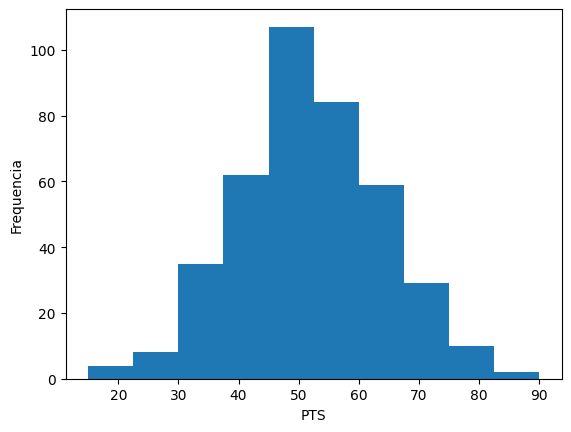

In [25]:
plt.hist(dfn['PTS'], bins=10)
plt.xlabel('PTS')
plt.ylabel('Frequencia')
plt.show()

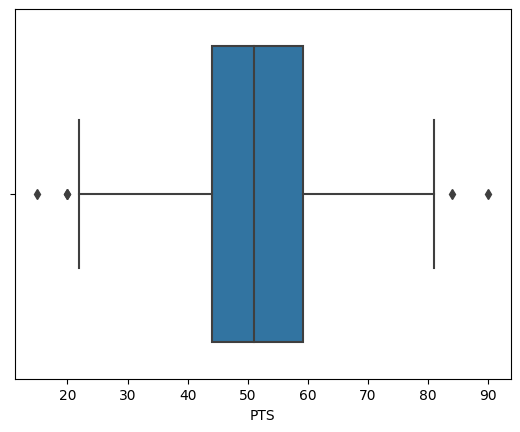

In [26]:
sns.boxplot(data=dfn, x='PTS')
plt.xlabel('PTS')
plt.show()

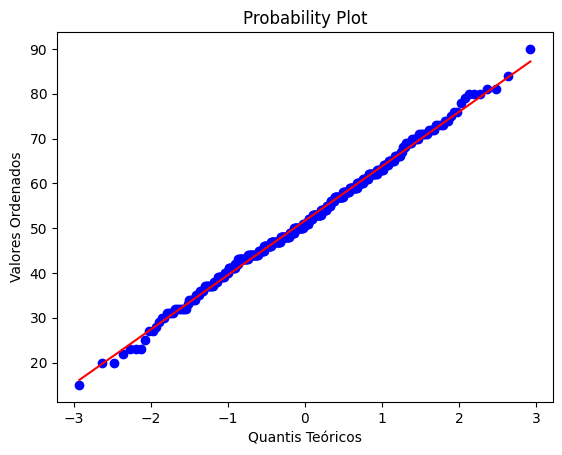

In [27]:
stats.probplot(dfn['PTS'], dist='norm', plot=plt)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Valores Ordenados')
plt.show()

In [28]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,Posição,PTS,J,V,E,D,GP,GC,SG,CA,CV,%,Ano,Peso
Posição,1.000000e+00,-0.665487,0.000093,-0.734242,0.075946,0.671113,-0.528654,0.445649,-0.880285,0.122865,0.187715,-0.940298,-5.581989e-15,-0.187591
PTS,-6.654875e-01,1.000000,0.703736,0.974293,0.417469,-0.097772,0.900072,0.182447,0.671626,0.507762,0.165665,0.643378,-3.679557e-01,0.119844
J,9.261971e-05,0.703736,1.000000,0.595083,0.665345,0.589363,0.695769,0.732485,-0.000590,0.838509,0.418997,-0.027737,-4.999090e-01,-0.026267
V,-7.342424e-01,0.974293,0.595083,1.000000,0.204258,-0.148246,0.889471,0.113331,0.722567,0.409762,0.118419,0.712259,-3.556847e-01,0.140274
E,7.594607e-02,0.417469,0.665345,0.204258,1.000000,0.174553,0.329434,0.338911,0.006670,0.557486,0.246854,-0.081945,-1.746443e-01,-0.038403
D,6.711127e-01,-0.097772,0.589363,-0.148246,0.174553,1.000000,0.037215,0.859301,-0.720755,0.582760,0.399797,-0.690986,-3.524726e-01,-0.154442
GP,-5.286538e-01,0.900072,0.695769,0.889471,0.329434,0.037215,1.000000,0.385739,0.585340,0.517913,0.229087,0.517249,-4.500620e-01,0.130070
GC,4.456486e-01,0.182447,0.732485,0.113331,0.338911,0.859301,0.385739,1.000000,-0.522251,0.687207,0.436846,-0.464090,-4.740316e-01,-0.100545
SG,-8.802854e-01,0.671626,-0.000590,0.722567,0.006670,-0.720755,0.585340,-0.522251,1.000000,-0.125197,-0.172149,0.885950,5.746581e-04,0.208586
CA,1.228650e-01,0.507762,0.838509,0.409762,0.557486,0.582760,0.517913,0.687207,-0.125197,1.000000,0.472241,-0.134114,-3.860859e-01,-0.118379


In [29]:
ks_test = stats.kstest(dfn['PTS'], 'norm')
print('Kolmogorov-Smirnov Test:')
print('Statistic:', ks_test.statistic)
print('p-value:', ks_test.pvalue)

Kolmogorov-Smirnov Test:
Statistic: 1.0
p-value: 0.0


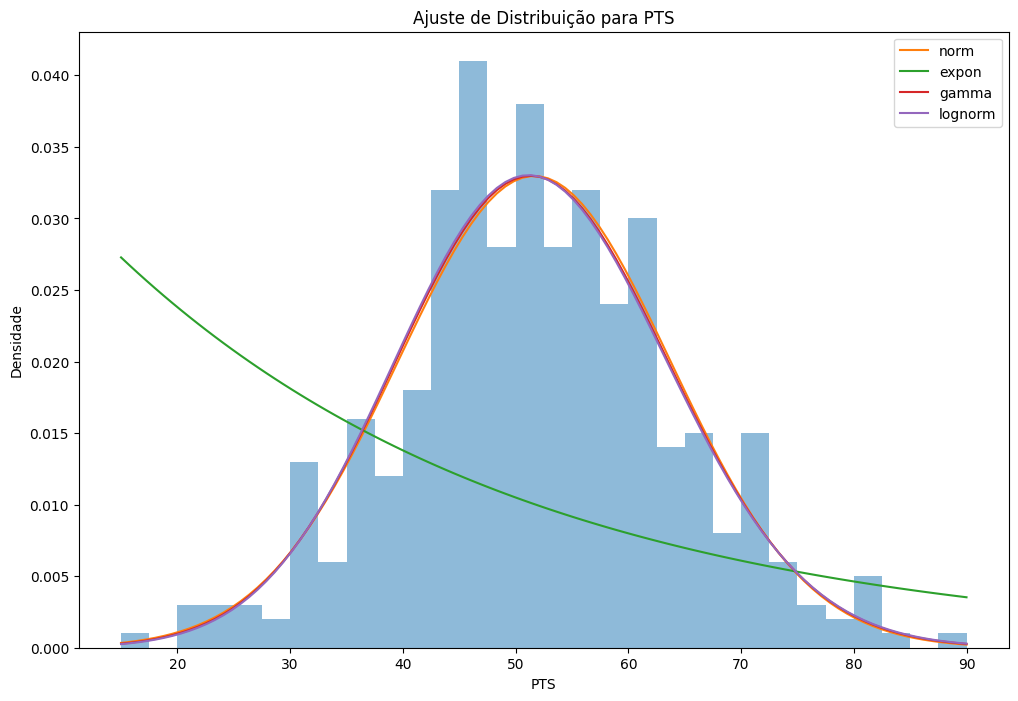

In [30]:
dist_names = ['norm', 'expon', 'gamma', 'lognorm']

best_fit_name = None
best_fit_params = {}
best_fit_distributions = []

for dist_name in dist_names:
    dist = getattr(stats, dist_name)
    params = dist.fit(dfn['PTS'])
    best_fit_distributions.append(dist)
    best_fit_params[dist_name] = params

plt.figure(figsize=(12, 8))
plt.hist(dfn['PTS'], bins=30, density=True, alpha=0.5)

for dist_name, params in best_fit_params.items():
    dist = best_fit_distributions[dist_names.index(dist_name)]
    x = np.linspace(dfn['PTS'].min(), dfn['PTS'].max(), 100)
    dist_instance = dist(*params[:-2], loc=params[-2], scale=params[-1])
    pdf = dist_instance.pdf(x)
    plt.plot(x, pdf, label=dist_name)

plt.xlabel('PTS')
plt.ylabel('Densidade')
plt.title('Ajuste de Distribuição para PTS')
plt.legend()
plt.show()

##### Analisando Vitórias

In [31]:
df['V'].mean()

12.770454545454545

In [32]:
times_serie_a_2023 = df[(df['Serie'] == 'A') & (df['Ano'] == 2023)]['Time'].unique()

filtro = (df['Time'].isin(times_serie_a_2023)) & (df['Serie'] == 'A') & (df['Ano'] < 2023)
media_times = df[filtro].groupby('Time')['V'].mean().sort_values(ascending=False)

for time, media in media_times.items():
    print("Time:", time)
    print("Média de Vitórias em Anos Anteriores (Série A):", round(media, 0))
    print("---")

Time: Palmeiras
Média de Vitórias em Anos Anteriores (Série A): 19.0
---
Time: Flamengo
Média de Vitórias em Anos Anteriores (Série A): 18.0
---
Time: Atlético Mineiro
Média de Vitórias em Anos Anteriores (Série A): 18.0
---
Time: Grêmio
Média de Vitórias em Anos Anteriores (Série A): 17.0
---
Time: Internacional
Média de Vitórias em Anos Anteriores (Série A): 16.0
---
Time: Corinthians
Média de Vitórias em Anos Anteriores (Série A): 16.0
---
Time: Cruzeiro
Média de Vitórias em Anos Anteriores (Série A): 16.0
---
Time: Athletico Paranaense
Média de Vitórias em Anos Anteriores (Série A): 16.0
---
Time: Santos
Média de Vitórias em Anos Anteriores (Série A): 16.0
---
Time: São Paulo
Média de Vitórias em Anos Anteriores (Série A): 15.0
---
Time: América Fc
Média de Vitórias em Anos Anteriores (Série A): 15.0
---
Time: Fluminense
Média de Vitórias em Anos Anteriores (Série A): 14.0
---
Time: Fortaleza
Média de Vitórias em Anos Anteriores (Série A): 14.0
---
Time: Botafogo
Média de Vitórias 

In [33]:
times_serie_b_2023 = df[(df['Serie'] == 'B') & (df['Ano'] == 2023)]['Time'].unique()

filtro = (df['Time'].isin(times_serie_b_2023)) & (df['Serie'] == 'B') & (df['Ano'] < 2023)
media_times = df[filtro].groupby('Time')['V'].mean().sort_values(ascending=False)

for time, media in media_times.items():
    print("Time:", time)
    print("Média de Vitórias em Anos Anteriores (Série B):", round(media, 0))
    print("---")

Time: Sport
Média de Vitórias em Anos Anteriores (Série B): 17.0
---
Time: Avaí
Média de Vitórias em Anos Anteriores (Série B): 17.0
---
Time: Chapecoense
Média de Vitórias em Anos Anteriores (Série B): 17.0
---
Time: Botafogo
Média de Vitórias em Anos Anteriores (Série B): 16.0
---
Time: Atlético
Média de Vitórias em Anos Anteriores (Série B): 16.0
---
Time: Ceará
Média de Vitórias em Anos Anteriores (Série B): 15.0
---
Time: Ituano
Média de Vitórias em Anos Anteriores (Série B): 15.0
---
Time: Crb
Média de Vitórias em Anos Anteriores (Série B): 14.0
---
Time: Ponte Preta
Média de Vitórias em Anos Anteriores (Série B): 14.0
---
Time: Londrina
Média de Vitórias em Anos Anteriores (Série B): 14.0
---
Time: Sampaio Corrêa
Média de Vitórias em Anos Anteriores (Série B): 14.0
---
Time: Guarani
Média de Vitórias em Anos Anteriores (Série B): 13.0
---
Time: Juventude
Média de Vitórias em Anos Anteriores (Série B): 12.0
---
Time: Vitória
Média de Vitórias em Anos Anteriores (Série B): 12.0
--

In [34]:
df['V'].median()

13.0

In [35]:
times_serie_a_2023 = df[(df['Serie'] == 'A') & (df['Ano'] == 2023)]['Time'].unique()

filtro = (df['Time'].isin(times_serie_a_2023)) & (df['Serie'] == 'A') & (df['Ano'] < 2023)
mediana_times= df[filtro].groupby('Time')['V'].median().sort_values(ascending=False)

for time, mediana in mediana_times.items():
    print("Time:", time)
    print("Mediana de Vitórias em Anos Anteriores (Série A):",mediana)
    print("---")

Time: Palmeiras
Mediana de Vitórias em Anos Anteriores (Série A): 20.0
---
Time: Flamengo
Mediana de Vitórias em Anos Anteriores (Série A): 19.0
---
Time: Grêmio
Mediana de Vitórias em Anos Anteriores (Série A): 18.0
---
Time: Atlético Mineiro
Mediana de Vitórias em Anos Anteriores (Série A): 17.0
---
Time: Internacional
Mediana de Vitórias em Anos Anteriores (Série A): 17.0
---
Time: Athletico Paranaense
Mediana de Vitórias em Anos Anteriores (Série A): 16.0
---
Time: América Fc
Mediana de Vitórias em Anos Anteriores (Série A): 15.0
---
Time: São Paulo
Mediana de Vitórias em Anos Anteriores (Série A): 15.0
---
Time: Santos
Mediana de Vitórias em Anos Anteriores (Série A): 15.0
---
Time: Corinthians
Mediana de Vitórias em Anos Anteriores (Série A): 15.0
---
Time: Cruzeiro
Mediana de Vitórias em Anos Anteriores (Série A): 15.0
---
Time: Fortaleza
Mediana de Vitórias em Anos Anteriores (Série A): 15.0
---
Time: Fluminense
Mediana de Vitórias em Anos Anteriores (Série A): 13.5
---
Time: B

In [36]:
times_serie_b_2023 = df[(df['Serie'] == 'B') & (df['Ano'] == 2023)]['Time'].unique()

filtro = (df['Time'].isin(times_serie_b_2023)) & (df['Serie'] == 'B') & (df['Ano'] < 2023)
mediana_times= df[filtro].groupby('Time')['V'].median().sort_values(ascending=False)

for time, mediana in mediana_times.items():
    print("Time:", time)
    print("Mediana de Vitórias em Anos Anteriores (Série B):",mediana)
    print("---")

Time: Chapecoense
Mediana de Vitórias em Anos Anteriores (Série B): 20.0
---
Time: Sport
Mediana de Vitórias em Anos Anteriores (Série B): 17.0
---
Time: Avaí
Mediana de Vitórias em Anos Anteriores (Série B): 17.0
---
Time: Botafogo
Mediana de Vitórias em Anos Anteriores (Série B): 16.5
---
Time: Ceará
Mediana de Vitórias em Anos Anteriores (Série B): 16.0
---
Time: Atlético
Mediana de Vitórias em Anos Anteriores (Série B): 15.5
---
Time: Ituano
Mediana de Vitórias em Anos Anteriores (Série B): 15.0
---
Time: Crb
Mediana de Vitórias em Anos Anteriores (Série B): 15.0
---
Time: Londrina
Mediana de Vitórias em Anos Anteriores (Série B): 14.5
---
Time: Ponte Preta
Mediana de Vitórias em Anos Anteriores (Série B): 14.0
---
Time: Sampaio Corrêa
Mediana de Vitórias em Anos Anteriores (Série B): 14.0
---
Time: Guarani
Mediana de Vitórias em Anos Anteriores (Série B): 13.0
---
Time: Juventude
Mediana de Vitórias em Anos Anteriores (Série B): 13.0
---
Time: Criciúma
Mediana de Vitórias em Anos 

In [37]:
df['V'].mode()[0]

11

In [38]:
times_serie_a_2023 = df[(df['Serie'] == 'A') & (df['Ano'] == 2023)]['Time'].unique()
filtro = (df['Time'].isin(times_serie_a_2023)) & (df['Serie'] == 'A') & (df['Ano'] < 2023)
moda_times = df[filtro].groupby('Time')['V'].apply(lambda x: x.mode()[0]).sort_values(ascending=False)

for time, moda in moda_times.items():
    print("Time:", time)
    print("Moda de Vitórias em Anos Anteriores (Série A):", moda)
    print("---")

Time: Flamengo
Moda de Vitórias em Anos Anteriores (Série A): 21
---
Time: Grêmio
Moda de Vitórias em Anos Anteriores (Série A): 18
---
Time: Atlético Mineiro
Moda de Vitórias em Anos Anteriores (Série A): 17
---
Time: Athletico Paranaense
Moda de Vitórias em Anos Anteriores (Série A): 16
---
Time: América Fc
Moda de Vitórias em Anos Anteriores (Série A): 15
---
Time: Fortaleza
Moda de Vitórias em Anos Anteriores (Série A): 15
---
Time: Palmeiras
Moda de Vitórias em Anos Anteriores (Série A): 15
---
Time: Cruzeiro
Moda de Vitórias em Anos Anteriores (Série A): 14
---
Time: São Paulo
Moda de Vitórias em Anos Anteriores (Série A): 13
---
Time: Botafogo
Moda de Vitórias em Anos Anteriores (Série A): 13
---
Time: Santos
Moda de Vitórias em Anos Anteriores (Série A): 12
---
Time: Fluminense
Moda de Vitórias em Anos Anteriores (Série A): 12
---
Time: Bahia
Moda de Vitórias em Anos Anteriores (Série A): 12
---
Time: Internacional
Moda de Vitórias em Anos Anteriores (Série A): 11
---
Time: Cor

In [39]:
times_serie_b_2023 = df[(df['Serie'] == 'B') & (df['Ano'] == 2023)]['Time'].unique()
filtro = (df['Time'].isin(times_serie_b_2023)) & (df['Serie'] == 'B') & (df['Ano'] < 2023)
moda_times = df[filtro].groupby('Time')['V'].apply(lambda x: x.mode()[0]).sort_values(ascending=False)

for time, moda in moda_times.items():
    print("Time:", time)
    print("Moda de Vitórias em Anos Anteriores (Série B):", moda)
    print("---")

Time: Chapecoense
Moda de Vitórias em Anos Anteriores (Série B): 20
---
Time: Avaí
Moda de Vitórias em Anos Anteriores (Série B): 16
---
Time: Ceará
Moda de Vitórias em Anos Anteriores (Série B): 16
---
Time: Ituano
Moda de Vitórias em Anos Anteriores (Série B): 15
---
Time: Vila Nova
Moda de Vitórias em Anos Anteriores (Série B): 15
---
Time: Crb
Moda de Vitórias em Anos Anteriores (Série B): 15
---
Time: Sport
Moda de Vitórias em Anos Anteriores (Série B): 15
---
Time: Guarani
Moda de Vitórias em Anos Anteriores (Série B): 13
---
Time: Criciúma
Moda de Vitórias em Anos Anteriores (Série B): 12
---
Time: Sampaio Corrêa
Moda de Vitórias em Anos Anteriores (Série B): 12
---
Time: Ponte Preta
Moda de Vitórias em Anos Anteriores (Série B): 12
---
Time: Novorizontino
Moda de Vitórias em Anos Anteriores (Série B): 11
---
Time: Vitória
Moda de Vitórias em Anos Anteriores (Série B): 11
---
Time: Londrina
Moda de Vitórias em Anos Anteriores (Série B): 11
---
Time: Atlético
Moda de Vitórias em 

In [40]:
df['V'].var()

25.657895009318686

In [41]:
df['V'].std()

5.065362278190839

In [42]:
freq_table = dfn['V'].value_counts().reset_index().sort_values('V', ascending=False)
freq_table.columns = ['Vitórias', 'Frequencia']

In [43]:
freq_table

,Vitórias,Frequencia
0,11,43
1,13,40
2,12,40
3,15,39
4,14,31
5,17,26
6,10,25
7,18,24
8,16,23
9,9,17


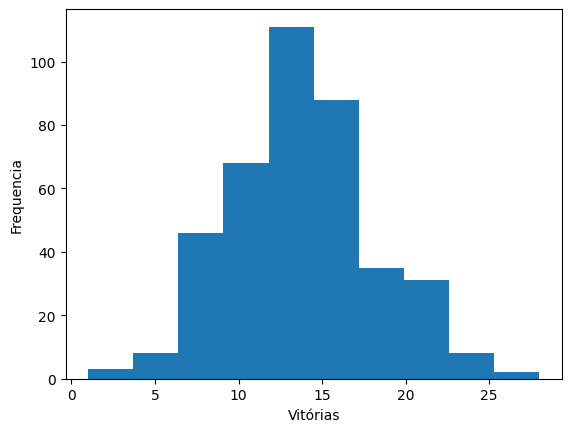

In [44]:
plt.hist(dfn['V'], bins=10)
plt.xlabel('Vitórias')
plt.ylabel('Frequencia')
plt.show()

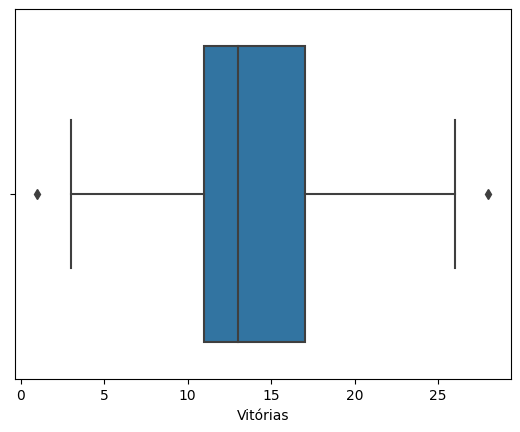

In [45]:
sns.boxplot(data=dfn, x='V')
plt.xlabel('Vitórias')
plt.show()

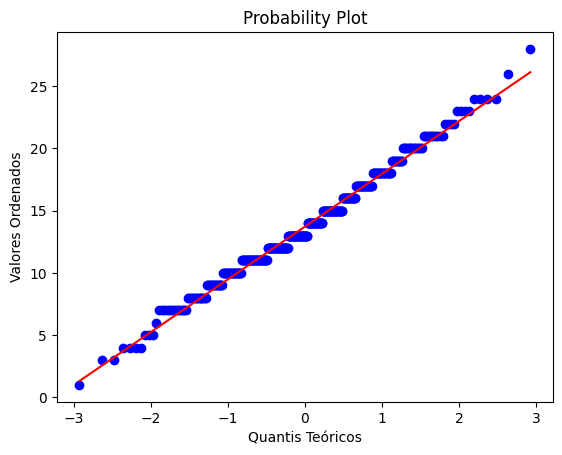

In [46]:
stats.probplot(dfn['V'], dist='norm', plot=plt)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Valores Ordenados')
plt.show()

In [47]:
ks_test = stats.kstest(dfn['V'], 'norm')
print('Kolmogorov-Smirnov Test:')
print('Statistic:', ks_test.statistic)
print('p-value:', ks_test.pvalue)

Kolmogorov-Smirnov Test:
Statistic: 0.99615010196837
p-value: 0.0


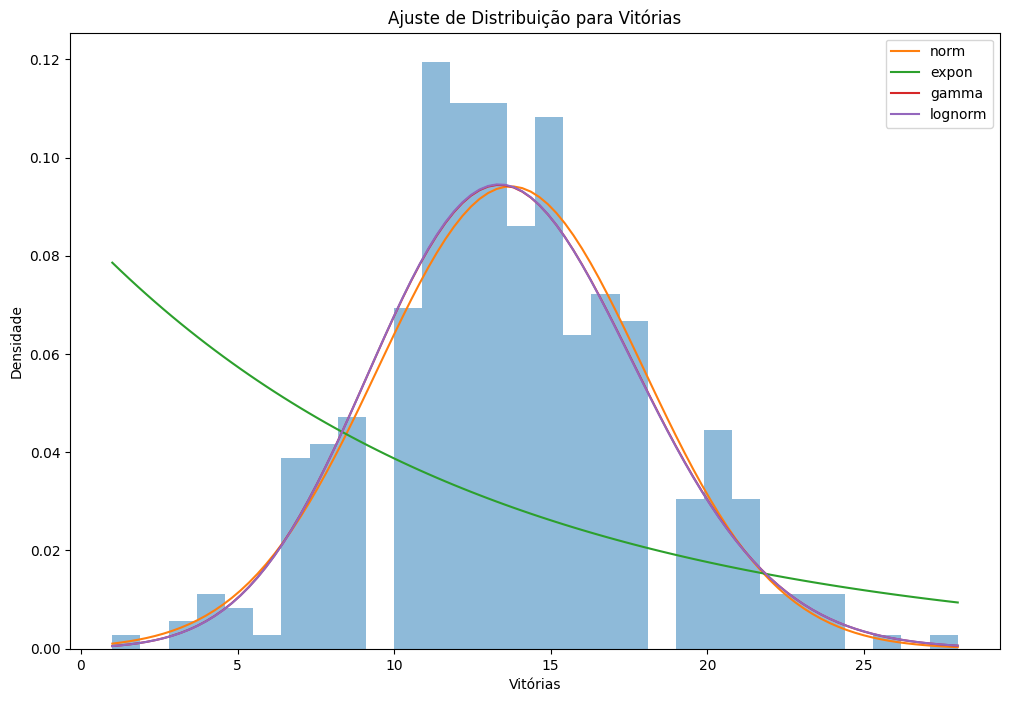

In [48]:
dist_names = ['norm', 'expon', 'gamma', 'lognorm']

best_fit_name = None
best_fit_params = {}
best_fit_distributions = []

for dist_name in dist_names:
    dist = getattr(stats, dist_name)
    params = dist.fit(dfn['V'])
    best_fit_distributions.append(dist)
    best_fit_params[dist_name] = params

plt.figure(figsize=(12, 8))
plt.hist(dfn['V'], bins=30, density=True, alpha=0.5)

for dist_name, params in best_fit_params.items():
    dist = best_fit_distributions[dist_names.index(dist_name)]
    x = np.linspace(dfn['V'].min(), dfn['V'].max(), 100)
    dist_instance = dist(*params[:-2], loc=params[-2], scale=params[-1])
    pdf = dist_instance.pdf(x)
    plt.plot(x, pdf, label=dist_name)

plt.xlabel('Vitórias')
plt.ylabel('Densidade')
plt.title('Ajuste de Distribuição para Vitórias')
plt.legend()
plt.show()

##### Analisando Empates

In [49]:
df['E'].mean()

9.763636363636364

In [50]:
times_serie_a_2023 = df[(df['Serie'] == 'A') & (df['Ano'] == 2023)]['Time'].unique()

filtro = (df['Time'].isin(times_serie_a_2023)) & (df['Serie'] == 'A') & (df['Ano'] < 2023)
media_times= df[filtro].groupby('Time')['E'].mean().sort_values(ascending=False)

for time, media in media_times.items():
    print("Time:", time)
    print("Média de Empates em Anos Anteriores (Série A):", round(media, 0))
    print("---")

Time: Cuiabá
Média de Empates em Anos Anteriores (Série A): 14.0
---
Time: Red Bull Bragantino
Média de Empates em Anos Anteriores (Série A): 13.0
---
Time: Corinthians
Média de Empates em Anos Anteriores (Série A): 12.0
---
Time: Vasco da Gama
Média de Empates em Anos Anteriores (Série A): 12.0
---
Time: São Paulo
Média de Empates em Anos Anteriores (Série A): 12.0
---
Time: Bahia
Média de Empates em Anos Anteriores (Série A): 11.0
---
Time: Internacional
Média de Empates em Anos Anteriores (Série A): 11.0
---
Time: Coritiba
Média de Empates em Anos Anteriores (Série A): 10.0
---
Time: Santos
Média de Empates em Anos Anteriores (Série A): 10.0
---
Time: Cruzeiro
Média de Empates em Anos Anteriores (Série A): 10.0
---
Time: Grêmio
Média de Empates em Anos Anteriores (Série A): 10.0
---
Time: Atlético Mineiro
Média de Empates em Anos Anteriores (Série A): 10.0
---
Time: Fluminense
Média de Empates em Anos Anteriores (Série A): 10.0
---
Time: Goiás
Média de Empates em Anos Anteriores (Sé

In [51]:
times_serie_b_2023 = df[(df['Serie'] == 'B') & (df['Ano'] == 2023)]['Time'].unique()

filtro = (df['Time'].isin(times_serie_b_2023)) & (df['Serie'] == 'B') & (df['Ano'] < 2023)
media_times= df[filtro].groupby('Time')['E'].mean().sort_values(ascending=False)

for time, media in media_times.items():
    print("Time:", time)
    print("Média de Empates em Anos Anteriores (Série B):", round(media, 0))
    print("---")

Time: Tombense
Média de Empates em Anos Anteriores (Série B): 15.0
---
Time: Vitória
Média de Empates em Anos Anteriores (Série B): 13.0
---
Time: Vila Nova
Média de Empates em Anos Anteriores (Série B): 13.0
---
Time: Criciúma
Média de Empates em Anos Anteriores (Série B): 13.0
---
Time: Chapecoense
Média de Empates em Anos Anteriores (Série B): 12.0
---
Time: Ponte Preta
Média de Empates em Anos Anteriores (Série B): 12.0
---
Time: Juventude
Média de Empates em Anos Anteriores (Série B): 12.0
---
Time: Ituano
Média de Empates em Anos Anteriores (Série B): 12.0
---
Time: Atlético
Média de Empates em Anos Anteriores (Série B): 11.0
---
Time: Novorizontino
Média de Empates em Anos Anteriores (Série B): 11.0
---
Time: Guarani
Média de Empates em Anos Anteriores (Série B): 11.0
---
Time: Sport
Média de Empates em Anos Anteriores (Série B): 11.0
---
Time: Sampaio Corrêa
Média de Empates em Anos Anteriores (Série B): 10.0
---
Time: Ceará
Média de Empates em Anos Anteriores (Série B): 10.0
-

In [52]:
df['E'].median()

10.0

In [53]:
times_serie_a_2023 = df[(df['Serie'] == 'A') & (df['Ano'] == 2023)]['Time'].unique()

filtro = (df['Time'].isin(times_serie_a_2023)) & (df['Serie'] == 'A') & (df['Ano'] < 2023)
mediana_times = df[filtro].groupby('Time')['E'].median().sort_values(ascending=False)

for time, mediana in mediana_times.items():
    print("Time:", time)
    print("Mediana de Empates em Anos Anteriores (Série A):", round(mediana, 0))
    print("---")

Time: Red Bull Bragantino
Mediana de Empates em Anos Anteriores (Série A): 14.0
---
Time: Cuiabá
Mediana de Empates em Anos Anteriores (Série A): 14.0
---
Time: São Paulo
Mediana de Empates em Anos Anteriores (Série A): 12.0
---
Time: Corinthians
Mediana de Empates em Anos Anteriores (Série A): 12.0
---
Time: Vasco da Gama
Mediana de Empates em Anos Anteriores (Série A): 11.0
---
Time: Bahia
Mediana de Empates em Anos Anteriores (Série A): 11.0
---
Time: Santos
Mediana de Empates em Anos Anteriores (Série A): 11.0
---
Time: Coritiba
Mediana de Empates em Anos Anteriores (Série A): 11.0
---
Time: Grêmio
Mediana de Empates em Anos Anteriores (Série A): 10.0
---
Time: Internacional
Mediana de Empates em Anos Anteriores (Série A): 10.0
---
Time: Fluminense
Mediana de Empates em Anos Anteriores (Série A): 10.0
---
Time: Cruzeiro
Mediana de Empates em Anos Anteriores (Série A): 10.0
---
Time: Atlético Mineiro
Mediana de Empates em Anos Anteriores (Série A): 10.0
---
Time: Athletico Paranaens

In [54]:
times_serie_b_2023 = df[(df['Serie'] == 'B') & (df['Ano'] == 2023)]['Time'].unique()

filtro = (df['Time'].isin(times_serie_b_2023)) & (df['Serie'] == 'B') & (df['Ano'] < 2023)
mediana_times = df[filtro].groupby('Time')['E'].median().sort_values(ascending=False)

for time, mediana in mediana_times.items():
    print("Time:", time)
    print("Mediana de Empates em Anos Anteriores (Série B):", round(mediana, 0))
    print("---")

Time: Vila Nova
Mediana de Empates em Anos Anteriores (Série B): 15.0
---
Time: Tombense
Mediana de Empates em Anos Anteriores (Série B): 15.0
---
Time: Vitória
Mediana de Empates em Anos Anteriores (Série B): 14.0
---
Time: Criciúma
Mediana de Empates em Anos Anteriores (Série B): 14.0
---
Time: Ponte Preta
Mediana de Empates em Anos Anteriores (Série B): 12.0
---
Time: Sport
Mediana de Empates em Anos Anteriores (Série B): 12.0
---
Time: Juventude
Mediana de Empates em Anos Anteriores (Série B): 12.0
---
Time: Ituano
Mediana de Empates em Anos Anteriores (Série B): 12.0
---
Time: Chapecoense
Mediana de Empates em Anos Anteriores (Série B): 12.0
---
Time: Guarani
Mediana de Empates em Anos Anteriores (Série B): 12.0
---
Time: Novorizontino
Mediana de Empates em Anos Anteriores (Série B): 11.0
---
Time: Atlético
Mediana de Empates em Anos Anteriores (Série B): 10.0
---
Time: Londrina
Mediana de Empates em Anos Anteriores (Série B): 10.0
---
Time: Sampaio Corrêa
Mediana de Empates em An

In [55]:
df['E'].mode()[0]

11

In [56]:
times_serie_a_2023 = df[(df['Serie'] == 'A') & (df['Ano'] == 2023)]['Time'].unique()
filtro = (df['Time'].isin(times_serie_a_2023)) & (df['Serie'] == 'A') & (df['Ano'] < 2023)
moda_times = df[filtro].groupby('Time')['E'].apply(lambda x: x.mode()[0]).sort_values(ascending=False)

for time, moda in moda_times.items():
    print("Time:", time)
    print("Moda de Empates em Anos Anteriores (Série A):", moda)
    print("---")

Time: São Paulo
Moda de Empates em Anos Anteriores (Série A): 15
---
Time: Red Bull Bragantino
Moda de Empates em Anos Anteriores (Série A): 14
---
Time: Santos
Moda de Empates em Anos Anteriores (Série A): 12
---
Time: Corinthians
Moda de Empates em Anos Anteriores (Série A): 12
---
Time: Vasco da Gama
Moda de Empates em Anos Anteriores (Série A): 11
---
Time: Cuiabá
Moda de Empates em Anos Anteriores (Série A): 11
---
Time: Athletico Paranaense
Moda de Empates em Anos Anteriores (Série A): 10
---
Time: Fluminense
Moda de Empates em Anos Anteriores (Série A): 10
---
Time: Coritiba
Moda de Empates em Anos Anteriores (Série A): 10
---
Time: Bahia
Moda de Empates em Anos Anteriores (Série A): 10
---
Time: Internacional
Moda de Empates em Anos Anteriores (Série A): 9
---
Time: Flamengo
Moda de Empates em Anos Anteriores (Série A): 8
---
Time: Goiás
Moda de Empates em Anos Anteriores (Série A): 8
---
Time: Grêmio
Moda de Empates em Anos Anteriores (Série A): 8
---
Time: Botafogo
Moda de Em

In [57]:
times_serie_b_2023 = df[(df['Serie'] == 'B') & (df['Ano'] == 2023)]['Time'].unique()
filtro = (df['Time'].isin(times_serie_b_2023)) & (df['Serie'] == 'B') & (df['Ano'] < 2023)
moda_times = df[filtro].groupby('Time')['E'].apply(lambda x: x.mode()[0]).sort_values(ascending=False)

for time, moda in moda_times.items():
    print("Time:", time)
    print("Moda de Empates em Anos Anteriores (Série B):", moda)
    print("---")

Time: Vila Nova
Moda de Empates em Anos Anteriores (Série B): 15
---
Time: Tombense
Moda de Empates em Anos Anteriores (Série B): 15
---
Time: Criciúma
Moda de Empates em Anos Anteriores (Série B): 14
---
Time: Ituano
Moda de Empates em Anos Anteriores (Série B): 12
---
Time: Chapecoense
Moda de Empates em Anos Anteriores (Série B): 12
---
Time: Guarani
Moda de Empates em Anos Anteriores (Série B): 12
---
Time: Ponte Preta
Moda de Empates em Anos Anteriores (Série B): 12
---
Time: Novorizontino
Moda de Empates em Anos Anteriores (Série B): 11
---
Time: Londrina
Moda de Empates em Anos Anteriores (Série B): 11
---
Time: Botafogo
Moda de Empates em Anos Anteriores (Série B): 10
---
Time: Sampaio Corrêa
Moda de Empates em Anos Anteriores (Série B): 10
---
Time: Juventude
Moda de Empates em Anos Anteriores (Série B): 10
---
Time: Vitória
Moda de Empates em Anos Anteriores (Série B): 9
---
Time: Ceará
Moda de Empates em Anos Anteriores (Série B): 9
---
Time: Atlético
Moda de Empates em Anos

In [58]:
df['E'].std()

3.7408714045245457

In [59]:
df['E'].var()

13.994118865189446

In [60]:
freq_table = dfn['E'].value_counts().reset_index().sort_values('E', ascending=False)
freq_table.columns = ['Empates', 'Frequencia']

In [61]:
freq_table

,Empates,Frequencia
0,11,58
1,10,55
2,8,50
3,12,48
4,9,45
5,13,37
6,14,25
7,7,21
8,6,17
9,15,13


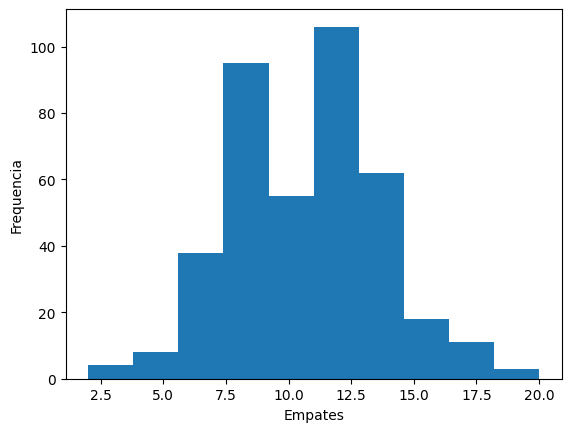

In [62]:
plt.hist(dfn['E'], bins=10)
plt.xlabel('Empates')
plt.ylabel('Frequencia')
plt.show()

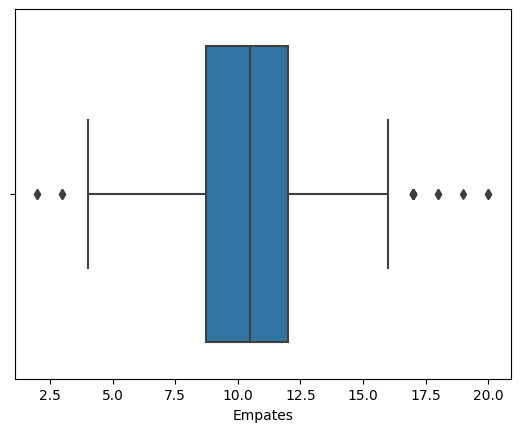

In [63]:
sns.boxplot(data=dfn, x='E')
plt.xlabel('Empates')
plt.show()

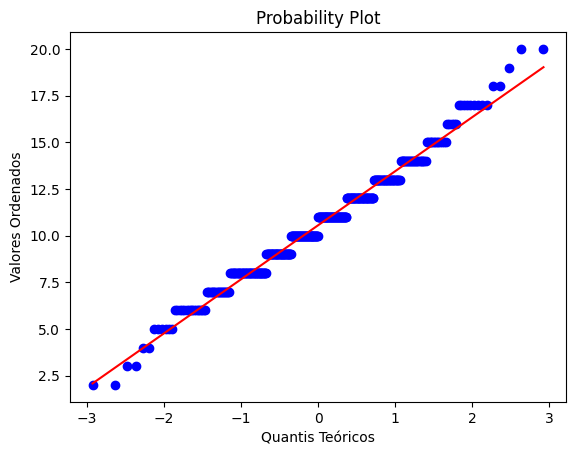

In [64]:
stats.probplot(dfn['E'], dist='norm', plot=plt)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Valores Ordenados')
plt.show()

##### Realizando o teste de normalidade de Kolmogorov-Smirnov

In [65]:
ks_test = stats.kstest(dfn['E'], 'norm')
print('Kolmogorov-Smirnov Test:')
print('Statistic:', ks_test.statistic)
print('p-value:', ks_test.pvalue)

Kolmogorov-Smirnov Test:
Statistic: 0.9936501019683699
p-value: 0.0


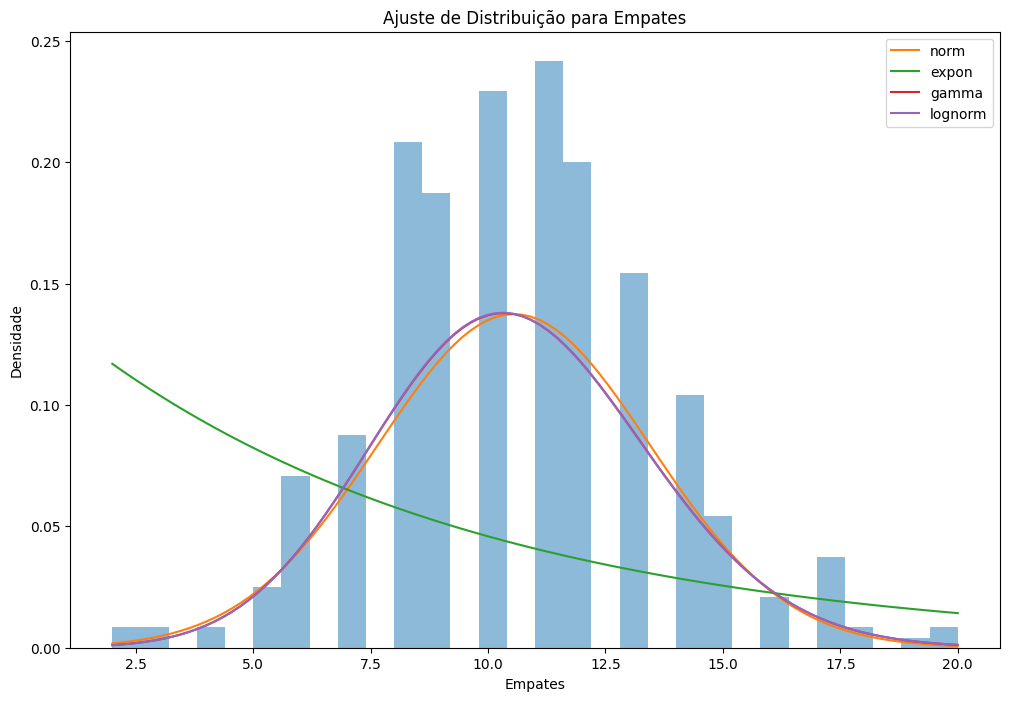

In [66]:
dist_names = ['norm', 'expon', 'gamma', 'lognorm']

best_fit_name = None
best_fit_params = {}
best_fit_distributions = []

for dist_name in dist_names:
    dist = getattr(stats, dist_name)
    params = dist.fit(dfn['E'])
    best_fit_distributions.append(dist)
    best_fit_params[dist_name] = params

plt.figure(figsize=(12, 8))
plt.hist(dfn['E'], bins=30, density=True, alpha=0.5)

for dist_name, params in best_fit_params.items():
    dist = best_fit_distributions[dist_names.index(dist_name)]
    x = np.linspace(dfn['E'].min(), dfn['E'].max(), 100)
    dist_instance = dist(*params[:-2], loc=params[-2], scale=params[-1])
    pdf = dist_instance.pdf(x)
    plt.plot(x, pdf, label=dist_name)

plt.xlabel('Empates')
plt.ylabel('Densidade')
plt.title('Ajuste de Distribuição para Empates')
plt.legend()
plt.show()

##### Analisando Derrotas

In [67]:
df['D'].mean()

12.775

In [68]:
times_serie_a_2023 = df[(df['Serie'] == 'A') & (df['Ano'] == 2023)]['Time'].unique()

filtro = (df['Time'].isin(times_serie_a_2023)) & (df['Serie'] == 'A') & (df['Ano'] < 2023)
media_times= df[filtro].groupby('Time')['D'].mean().sort_values(ascending=False)

for time, media in media_times.items():
    print("Time:", time)
    print("Média de Derrotas em Anos Anteriores (Série A):", round(media, 0))
    print("---")

Time: Coritiba
Média de Derrotas em Anos Anteriores (Série A): 17.0
---
Time: Goiás
Média de Derrotas em Anos Anteriores (Série A): 16.0
---
Time: Botafogo
Média de Derrotas em Anos Anteriores (Série A): 16.0
---
Time: Bahia
Média de Derrotas em Anos Anteriores (Série A): 16.0
---
Time: América Fc
Média de Derrotas em Anos Anteriores (Série A): 15.0
---
Time: Vasco da Gama
Média de Derrotas em Anos Anteriores (Série A): 15.0
---
Time: Fortaleza
Média de Derrotas em Anos Anteriores (Série A): 15.0
---
Time: Cuiabá
Média de Derrotas em Anos Anteriores (Série A): 14.0
---
Time: Fluminense
Média de Derrotas em Anos Anteriores (Série A): 14.0
---
Time: Athletico Paranaense
Média de Derrotas em Anos Anteriores (Série A): 13.0
---
Time: Red Bull Bragantino
Média de Derrotas em Anos Anteriores (Série A): 12.0
---
Time: Santos
Média de Derrotas em Anos Anteriores (Série A): 12.0
---
Time: Cruzeiro
Média de Derrotas em Anos Anteriores (Série A): 12.0
---
Time: Grêmio
Média de Derrotas em Anos An

In [69]:
times_serie_b_2023 = df[(df['Serie'] == 'B') & (df['Ano'] == 2023)]['Time'].unique()

filtro = (df['Time'].isin(times_serie_b_2023)) & (df['Serie'] == 'B') & (df['Ano'] < 2023)
media_times= df[filtro].groupby('Time')['D'].mean().sort_values(ascending=False)

for time, media in media_times.items():
    print("Time:", time)
    print("Média de Derrotas em Anos Anteriores (Série B):", round(media, 0))
    print("---")


Time: Abc
Média de Derrotas em Anos Anteriores (Série B): 19.0
---
Time: Novorizontino
Média de Derrotas em Anos Anteriores (Série B): 16.0
---
Time: Guarani
Média de Derrotas em Anos Anteriores (Série B): 14.0
---
Time: Londrina
Média de Derrotas em Anos Anteriores (Série B): 14.0
---
Time: Crb
Média de Derrotas em Anos Anteriores (Série B): 14.0
---
Time: Juventude
Média de Derrotas em Anos Anteriores (Série B): 14.0
---
Time: Sampaio Corrêa
Média de Derrotas em Anos Anteriores (Série B): 14.0
---
Time: Vila Nova
Média de Derrotas em Anos Anteriores (Série B): 13.0
---
Time: Criciúma
Média de Derrotas em Anos Anteriores (Série B): 13.0
---
Time: Tombense
Média de Derrotas em Anos Anteriores (Série B): 13.0
---
Time: Vitória
Média de Derrotas em Anos Anteriores (Série B): 13.0
---
Time: Botafogo
Média de Derrotas em Anos Anteriores (Série B): 12.0
---
Time: Ceará
Média de Derrotas em Anos Anteriores (Série B): 12.0
---
Time: Avaí
Média de Derrotas em Anos Anteriores (Série B): 12.0
--

In [70]:
df['D'].median()

13.0

In [71]:
times_serie_a_2023 = df[(df['Serie'] == 'A') & (df['Ano'] == 2023)]['Time'].unique()

filtro = (df['Time'].isin(times_serie_a_2023)) & (df['Serie'] == 'A') & (df['Ano'] < 2023)
mediana_times = df[filtro].groupby('Time')['D'].median().sort_values(ascending=False)

for time, mediana in mediana_times.items():
    print("Time:", time)
    print("Mediana de Derrotas em Anos Anteriores (Série A):", round(mediana, 0))
    print("---")

Time: Goiás
Mediana de Derrotas em Anos Anteriores (Série A): 16.0
---
Time: Coritiba
Mediana de Derrotas em Anos Anteriores (Série A): 16.0
---
Time: Vasco da Gama
Mediana de Derrotas em Anos Anteriores (Série A): 16.0
---
Time: América Fc
Mediana de Derrotas em Anos Anteriores (Série A): 15.0
---
Time: Fortaleza
Mediana de Derrotas em Anos Anteriores (Série A): 14.0
---
Time: Botafogo
Mediana de Derrotas em Anos Anteriores (Série A): 14.0
---
Time: Bahia
Mediana de Derrotas em Anos Anteriores (Série A): 14.0
---
Time: Cuiabá
Mediana de Derrotas em Anos Anteriores (Série A): 14.0
---
Time: Fluminense
Mediana de Derrotas em Anos Anteriores (Série A): 14.0
---
Time: Cruzeiro
Mediana de Derrotas em Anos Anteriores (Série A): 13.0
---
Time: Athletico Paranaense
Mediana de Derrotas em Anos Anteriores (Série A): 12.0
---
Time: Internacional
Mediana de Derrotas em Anos Anteriores (Série A): 12.0
---
Time: Santos
Mediana de Derrotas em Anos Anteriores (Série A): 12.0
---
Time: Grêmio
Mediana 

In [72]:
times_serie_b_2023 = df[(df['Serie'] == 'B') & (df['Ano'] == 2023)]['Time'].unique()

filtro = (df['Time'].isin(times_serie_b_2023)) & (df['Serie'] == 'B') & (df['Ano'] < 2023)
mediana_times = df[filtro].groupby('Time')['D'].median().sort_values(ascending=False)

for time, mediana in mediana_times.items():
    print("Time:", time)
    print("Mediana de Derrotas em Anos Anteriores (Série b):", round(mediana, 0))
    print("---")

Time: Abc
Mediana de Derrotas em Anos Anteriores (Série b): 18.0
---
Time: Novorizontino
Mediana de Derrotas em Anos Anteriores (Série b): 16.0
---
Time: Guarani
Mediana de Derrotas em Anos Anteriores (Série b): 14.0
---
Time: Crb
Mediana de Derrotas em Anos Anteriores (Série b): 14.0
---
Time: Sampaio Corrêa
Mediana de Derrotas em Anos Anteriores (Série b): 14.0
---
Time: Criciúma
Mediana de Derrotas em Anos Anteriores (Série b): 14.0
---
Time: Juventude
Mediana de Derrotas em Anos Anteriores (Série b): 13.0
---
Time: Tombense
Mediana de Derrotas em Anos Anteriores (Série b): 13.0
---
Time: Ponte Preta
Mediana de Derrotas em Anos Anteriores (Série b): 13.0
---
Time: Londrina
Mediana de Derrotas em Anos Anteriores (Série b): 13.0
---
Time: Vitória
Mediana de Derrotas em Anos Anteriores (Série b): 13.0
---
Time: Atlético
Mediana de Derrotas em Anos Anteriores (Série b): 12.0
---
Time: Ceará
Mediana de Derrotas em Anos Anteriores (Série b): 12.0
---
Time: Botafogo
Mediana de Derrotas em 

In [73]:
df['E'].mode()[0]

11

In [74]:
times_serie_a_2023 = df[(df['Serie'] == 'A') & (df['Ano'] == 2023)]['Time'].unique()
filtro = (df['Time'].isin(times_serie_a_2023)) & (df['Serie'] == 'A') & (df['Ano'] < 2023)
moda_times = df[filtro].groupby('Time')['D'].apply(lambda x: x.mode()[0]).sort_values(ascending=False)

for time, moda in moda_times.items():
    print("Time:", time)
    print("Moda de Derrotas em Anos Anteriores (Série A):", moda)
    print("---")

Time: Vasco da Gama
Moda de Derrotas em Anos Anteriores (Série A): 17
---
Time: América Fc
Moda de Derrotas em Anos Anteriores (Série A): 15
---
Time: Coritiba
Moda de Derrotas em Anos Anteriores (Série A): 14
---
Time: Bahia
Moda de Derrotas em Anos Anteriores (Série A): 14
---
Time: Fortaleza
Moda de Derrotas em Anos Anteriores (Série A): 13
---
Time: Botafogo
Moda de Derrotas em Anos Anteriores (Série A): 13
---
Time: Cruzeiro
Moda de Derrotas em Anos Anteriores (Série A): 13
---
Time: Santos
Moda de Derrotas em Anos Anteriores (Série A): 12
---
Time: Internacional
Moda de Derrotas em Anos Anteriores (Série A): 12
---
Time: Grêmio
Moda de Derrotas em Anos Anteriores (Série A): 11
---
Time: Cuiabá
Moda de Derrotas em Anos Anteriores (Série A): 11
---
Time: Goiás
Moda de Derrotas em Anos Anteriores (Série A): 11
---
Time: Red Bull Bragantino
Moda de Derrotas em Anos Anteriores (Série A): 10
---
Time: Atlético Mineiro
Moda de Derrotas em Anos Anteriores (Série A): 10
---
Time: Athletic

In [75]:
times_serie_b_2023 = df[(df['Serie'] == 'B') & (df['Ano'] == 2023)]['Time'].unique()
filtro = (df['Time'].isin(times_serie_b_2023)) & (df['Serie'] == 'B') & (df['Ano'] < 2023)
moda_times = df[filtro].groupby('Time')['D'].apply(lambda x: x.mode()[0]).sort_values(ascending=False)

for time, moda in moda_times.items():
    print("Time:", time)
    print("Moda de Derrotas em Anos Anteriores (Série B):", moda)
    print("---")

Time: Abc
Moda de Derrotas em Anos Anteriores (Série B): 18
---
Time: Novorizontino
Moda de Derrotas em Anos Anteriores (Série B): 16
---
Time: Guarani
Moda de Derrotas em Anos Anteriores (Série B): 16
---
Time: Crb
Moda de Derrotas em Anos Anteriores (Série B): 14
---
Time: Tombense
Moda de Derrotas em Anos Anteriores (Série B): 13
---
Time: Ponte Preta
Moda de Derrotas em Anos Anteriores (Série B): 13
---
Time: Criciúma
Moda de Derrotas em Anos Anteriores (Série B): 13
---
Time: Londrina
Moda de Derrotas em Anos Anteriores (Série B): 13
---
Time: Sampaio Corrêa
Moda de Derrotas em Anos Anteriores (Série B): 12
---
Time: Juventude
Moda de Derrotas em Anos Anteriores (Série B): 11
---
Time: Ituano
Moda de Derrotas em Anos Anteriores (Série B): 11
---
Time: Avaí
Moda de Derrotas em Anos Anteriores (Série B): 10
---
Time: Vitória
Moda de Derrotas em Anos Anteriores (Série B): 10
---
Time: Ceará
Moda de Derrotas em Anos Anteriores (Série B): 9
---
Time: Vila Nova
Moda de Derrotas em Anos 

In [76]:
df['D'].std()

5.119689314676772

In [77]:
df['D'].var()

26.211218678815513

In [78]:
freq_table = dfn['D'].value_counts().reset_index().sort_values('D', ascending=False)
freq_table.columns = ['Derrotas', 'Frequencia']

In [79]:
freq_table

,Derrotas,Frequencia
0,14,47
1,13,41
2,11,38
3,10,35
4,15,31
5,12,29
6,17,29
7,16,24
8,18,16
9,19,14


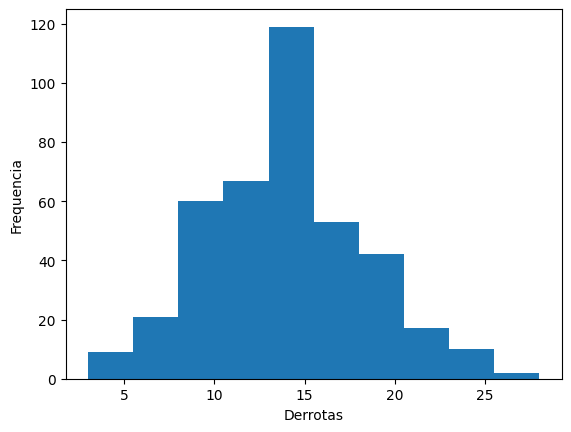

In [80]:
plt.hist(dfn['D'], bins=10)
plt.xlabel('Derrotas')
plt.ylabel('Frequencia')
plt.show()

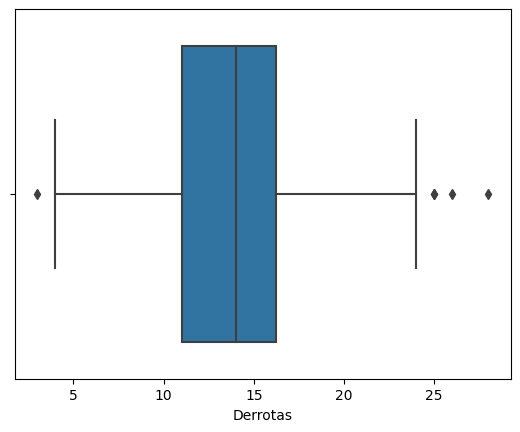

In [81]:
sns.boxplot(data=dfn, x='D')
plt.xlabel('Derrotas')
plt.show()

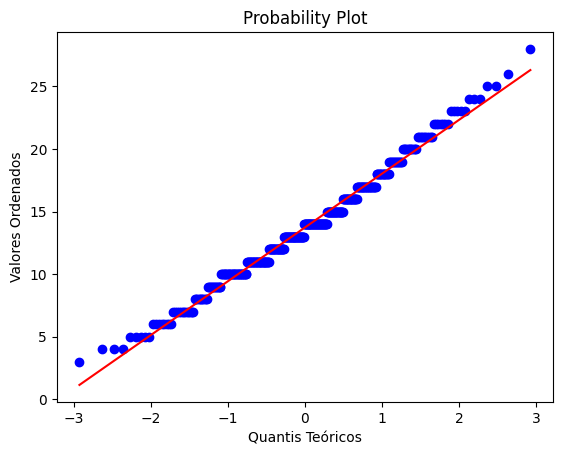

In [82]:
stats.probplot(dfn['D'], dist='norm', plot=plt)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Valores Ordenados')
plt.show()

In [83]:
ks_test = stats.kstest(dfn['D'], 'norm')
print('Kolmogorov-Smirnov Test:')
print('Statistic:', ks_test.statistic)
print('p-value:', ks_test.pvalue)

Kolmogorov-Smirnov Test:
Statistic: 0.9986501019683699
p-value: 0.0


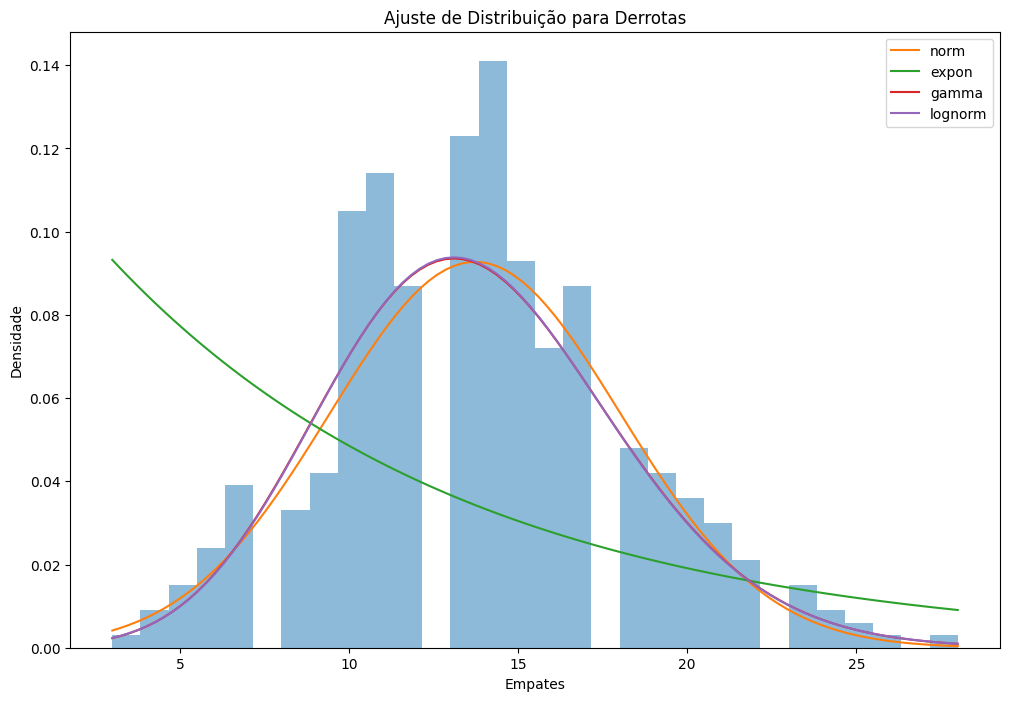

In [84]:
dist_names = ['norm', 'expon', 'gamma', 'lognorm']

best_fit_name = None
best_fit_params = {}
best_fit_distributions = []

for dist_name in dist_names:
    dist = getattr(stats, dist_name)
    params = dist.fit(dfn['D'])
    best_fit_distributions.append(dist)
    best_fit_params[dist_name] = params

plt.figure(figsize=(12, 8))
plt.hist(dfn['D'], bins=30, density=True, alpha=0.5)

for dist_name, params in best_fit_params.items():
    dist = best_fit_distributions[dist_names.index(dist_name)]
    x = np.linspace(dfn['D'].min(), dfn['D'].max(), 100)
    dist_instance = dist(*params[:-2], loc=params[-2], scale=params[-1])
    pdf = dist_instance.pdf(x)
    plt.plot(x, pdf, label=dist_name)

plt.xlabel('Empates')
plt.ylabel('Densidade')
plt.title('Ajuste de Distribuição para Derrotas')
plt.legend()
plt.show()

##### Analisando Gols Pró

In [85]:
df['GP'].mean()

40.78409090909091

In [86]:
times_serie_a_2023 = df[(df['Serie'] == 'A') & (df['Ano'] == 2023)]['Time'].unique()

filtro = (df['Time'].isin(times_serie_a_2023)) & (df['Serie'] == 'A') & (df['Ano'] < 2023)
media_times = df[filtro].groupby('Time')['GP'].mean().sort_values(ascending=False)

for time, media in media_times.items():
    print("Time:", time)
    print("Média de Gols Pró em Anos Anteriores (Série A):", round(media, 0))
    print("---")

Time: Flamengo
Média de Gols Pró em Anos Anteriores (Série A): 58.0
---
Time: Palmeiras
Média de Gols Pró em Anos Anteriores (Série A): 57.0
---
Time: Atlético Mineiro
Média de Gols Pró em Anos Anteriores (Série A): 55.0
---
Time: Red Bull Bragantino
Média de Gols Pró em Anos Anteriores (Série A): 51.0
---
Time: Athletico Paranaense
Média de Gols Pró em Anos Anteriores (Série A): 50.0
---
Time: Cruzeiro
Média de Gols Pró em Anos Anteriores (Série A): 49.0
---
Time: Santos
Média de Gols Pró em Anos Anteriores (Série A): 49.0
---
Time: Internacional
Média de Gols Pró em Anos Anteriores (Série A): 48.0
---
Time: Grêmio
Média de Gols Pró em Anos Anteriores (Série A): 48.0
---
Time: São Paulo
Média de Gols Pró em Anos Anteriores (Série A): 47.0
---
Time: Fluminense
Média de Gols Pró em Anos Anteriores (Série A): 46.0
---
Time: Corinthians
Média de Gols Pró em Anos Anteriores (Série A): 45.0
---
Time: Fortaleza
Média de Gols Pró em Anos Anteriores (Série A): 44.0
---
Time: Goiás
Média de Gol

In [87]:
times_serie_b_2023 = df[(df['Serie'] == 'B') & (df['Ano'] == 2023)]['Time'].unique()

filtro = (df['Time'].isin(times_serie_b_2023)) & (df['Serie'] == 'B') & (df['Ano'] < 2023)
media_times = df[filtro].groupby('Time')['GP'].mean().sort_values(ascending=False)

for time, media in media_times.items():
    print("Time:", time)
    print("Média de Gols Pró em Anos Anteriores (Série B):", round(media, 0))
    print("---")

Time: Ceará
Média de Gols Pró em Anos Anteriores (Série B): 51.0
---
Time: Sport
Média de Gols Pró em Anos Anteriores (Série B): 50.0
---
Time: Atlético
Média de Gols Pró em Anos Anteriores (Série B): 49.0
---
Time: Avaí
Média de Gols Pró em Anos Anteriores (Série B): 47.0
---
Time: Chapecoense
Média de Gols Pró em Anos Anteriores (Série B): 46.0
---
Time: Ponte Preta
Média de Gols Pró em Anos Anteriores (Série B): 45.0
---
Time: Botafogo
Média de Gols Pró em Anos Anteriores (Série B): 45.0
---
Time: Sampaio Corrêa
Média de Gols Pró em Anos Anteriores (Série B): 44.0
---
Time: Vitória
Média de Gols Pró em Anos Anteriores (Série B): 44.0
---
Time: Novorizontino
Média de Gols Pró em Anos Anteriores (Série B): 44.0
---
Time: Crb
Média de Gols Pró em Anos Anteriores (Série B): 44.0
---
Time: Ituano
Média de Gols Pró em Anos Anteriores (Série B): 42.0
---
Time: Londrina
Média de Gols Pró em Anos Anteriores (Série B): 41.0
---
Time: Criciúma
Média de Gols Pró em Anos Anteriores (Série B): 41

In [88]:
df['GP'].median()

42.0

In [89]:
times_serie_a_2023 = df[(df['Serie'] == 'A') & (df['Ano'] == 2023)]['Time'].unique()

filtro = (df['Time'].isin(times_serie_a_2023)) & (df['Serie'] == 'A') & (df['Ano'] < 2023)
mediana_times = df[filtro].groupby('Time')['GP'].median().sort_values(ascending=False)

for time, mediana in mediana_times.items():
    print("Time:", time)
    print("Mediana de Gols Pró em Anos Anteriores (Série A):", round(mediana, 0))
    print("---")

Time: Palmeiras
Mediana de Gols Pró em Anos Anteriores (Série A): 61.0
---
Time: Flamengo
Mediana de Gols Pró em Anos Anteriores (Série A): 56.0
---
Time: Atlético Mineiro
Mediana de Gols Pró em Anos Anteriores (Série A): 54.0
---
Time: Internacional
Mediana de Gols Pró em Anos Anteriores (Série A): 51.0
---
Time: Red Bull Bragantino
Mediana de Gols Pró em Anos Anteriores (Série A): 50.0
---
Time: Athletico Paranaense
Mediana de Gols Pró em Anos Anteriores (Série A): 50.0
---
Time: Santos
Mediana de Gols Pró em Anos Anteriores (Série A): 48.0
---
Time: Grêmio
Mediana de Gols Pró em Anos Anteriores (Série A): 48.0
---
Time: São Paulo
Mediana de Gols Pró em Anos Anteriores (Série A): 47.0
---
Time: Cruzeiro
Mediana de Gols Pró em Anos Anteriores (Série A): 47.0
---
Time: Fortaleza
Mediana de Gols Pró em Anos Anteriores (Série A): 45.0
---
Time: Corinthians
Mediana de Gols Pró em Anos Anteriores (Série A): 44.0
---
Time: Fluminense
Mediana de Gols Pró em Anos Anteriores (Série A): 44.0
--

In [90]:
times_serie_b_2023 = df[(df['Serie'] == 'B') & (df['Ano'] == 2023)]['Time'].unique()

filtro = (df['Time'].isin(times_serie_b_2023)) & (df['Serie'] == 'B') & (df['Ano'] < 2023)
mediana_times = df[filtro].groupby('Time')['GP'].median().sort_values(ascending=False)

for time, mediana in mediana_times.items():
    print("Time:", time)
    print("Mediana de Gols Pró em Anos Anteriores (Série B):", round(mediana, 0))
    print("---")

Time: Atlético
Mediana de Gols Pró em Anos Anteriores (Série B): 49.0
---
Time: Ceará
Mediana de Gols Pró em Anos Anteriores (Série B): 49.0
---
Time: Sport
Mediana de Gols Pró em Anos Anteriores (Série B): 49.0
---
Time: Botafogo
Mediana de Gols Pró em Anos Anteriores (Série B): 47.0
---
Time: Avaí
Mediana de Gols Pró em Anos Anteriores (Série B): 46.0
---
Time: Crb
Mediana de Gols Pró em Anos Anteriores (Série B): 46.0
---
Time: Sampaio Corrêa
Mediana de Gols Pró em Anos Anteriores (Série B): 44.0
---
Time: Novorizontino
Mediana de Gols Pró em Anos Anteriores (Série B): 44.0
---
Time: Vitória
Mediana de Gols Pró em Anos Anteriores (Série B): 44.0
---
Time: Ituano
Mediana de Gols Pró em Anos Anteriores (Série B): 42.0
---
Time: Criciúma
Mediana de Gols Pró em Anos Anteriores (Série B): 42.0
---
Time: Chapecoense
Mediana de Gols Pró em Anos Anteriores (Série B): 42.0
---
Time: Ponte Preta
Mediana de Gols Pró em Anos Anteriores (Série B): 42.0
---
Time: Londrina
Mediana de Gols Pró em A

In [91]:
df['GP'].mode()[0]

44

In [92]:
times_serie_a_2023 = df[(df['Serie'] == 'A') & (df['Ano'] == 2023)]['Time'].unique()
filtro = (df['Time'].isin(times_serie_a_2023)) & (df['Serie'] == 'A') & (df['Ano'] < 2023)
moda_times = df[filtro].groupby('Time')['GP'].apply(lambda x: x.mode()[0]).sort_values(ascending=False)

for time, moda in moda_times.items():
    print("Time:", time)
    print("Moda de Gols Pró em Anos Anteriores (Série A):", moda)
    print("---")

Time: Palmeiras
Moda de Gols Pró em Anos Anteriores (Série A): 61
---
Time: Red Bull Bragantino
Moda de Gols Pró em Anos Anteriores (Série A): 49
---
Time: Atlético Mineiro
Moda de Gols Pró em Anos Anteriores (Série A): 44
---
Time: Internacional
Moda de Gols Pró em Anos Anteriores (Série A): 44
---
Time: Flamengo
Moda de Gols Pró em Anos Anteriores (Série A): 43
---
Time: Santos
Moda de Gols Pró em Anos Anteriores (Série A): 42
---
Time: Coritiba
Moda de Gols Pró em Anos Anteriores (Série A): 42
---
Time: América Fc
Moda de Gols Pró em Anos Anteriores (Série A): 40
---
Time: São Paulo
Moda de Gols Pró em Anos Anteriores (Série A): 39
---
Time: Goiás
Moda de Gols Pró em Anos Anteriores (Série A): 38
---
Time: Fluminense
Moda de Gols Pró em Anos Anteriores (Série A): 38
---
Time: Athletico Paranaense
Moda de Gols Pró em Anos Anteriores (Série A): 38
---
Time: Grêmio
Moda de Gols Pró em Anos Anteriores (Série A): 36
---
Time: Fortaleza
Moda de Gols Pró em Anos Anteriores (Série A): 34
--

In [93]:
times_serie_b_2023 = df[(df['Serie'] == 'B') & (df['Ano'] == 2023)]['Time'].unique()
filtro = (df['Time'].isin(times_serie_b_2023)) & (df['Serie'] == 'B') & (df['Ano'] < 2023)
moda_times = df[filtro].groupby('Time')['GP'].apply(lambda x: x.mode()[0]).sort_values(ascending=False)

for time, moda in moda_times.items():
    print("Time:", time)
    print("Moda de Gols Pró em Anos Anteriores (Série B):", moda)
    print("---")

Time: Avaí
Moda de Gols Pró em Anos Anteriores (Série B): 45
---
Time: Novorizontino
Moda de Gols Pró em Anos Anteriores (Série B): 44
---
Time: Ituano
Moda de Gols Pró em Anos Anteriores (Série B): 42
---
Time: Ceará
Moda de Gols Pró em Anos Anteriores (Série B): 42
---
Time: Sampaio Corrêa
Moda de Gols Pró em Anos Anteriores (Série B): 41
---
Time: Tombense
Moda de Gols Pró em Anos Anteriores (Série B): 38
---
Time: Chapecoense
Moda de Gols Pró em Anos Anteriores (Série B): 37
---
Time: Sport
Moda de Gols Pró em Anos Anteriores (Série B): 37
---
Time: Atlético
Moda de Gols Pró em Anos Anteriores (Série B): 36
---
Time: Vila Nova
Moda de Gols Pró em Anos Anteriores (Série B): 35
---
Time: Crb
Moda de Gols Pró em Anos Anteriores (Série B): 35
---
Time: Ponte Preta
Moda de Gols Pró em Anos Anteriores (Série B): 34
---
Time: Vitória
Moda de Gols Pró em Anos Anteriores (Série B): 31
---
Time: Londrina
Moda de Gols Pró em Anos Anteriores (Série B): 31
---
Time: Criciúma
Moda de Gols Pró em

In [94]:
df['GP'].std()

13.887974234165567

In [95]:
df['GP'].var()

192.87582832884664

In [96]:
freq_table = dfn['GP'].value_counts().reset_index().sort_values('GP', ascending=False)
freq_table.columns = ['Gols Pró', 'Frequencia']

In [97]:
freq_table

,Gols Pró,Frequencia
0,44,19
2,42,18
3,48,18
1,41,18
4,40,16
5,45,16
6,49,16
7,31,16
8,34,15
9,50,15


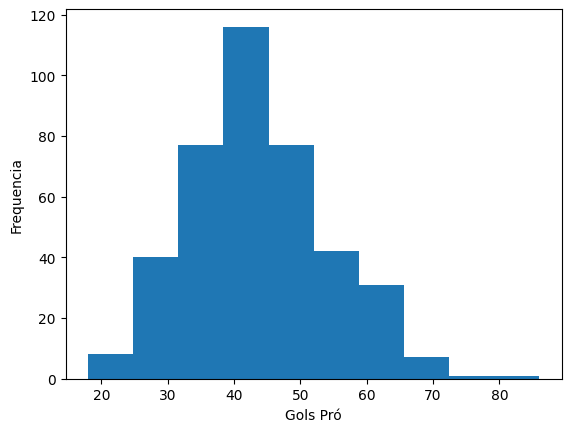

In [98]:
plt.hist(dfn['GP'], bins=10)
plt.xlabel('Gols Pró')
plt.ylabel('Frequencia')
plt.show()

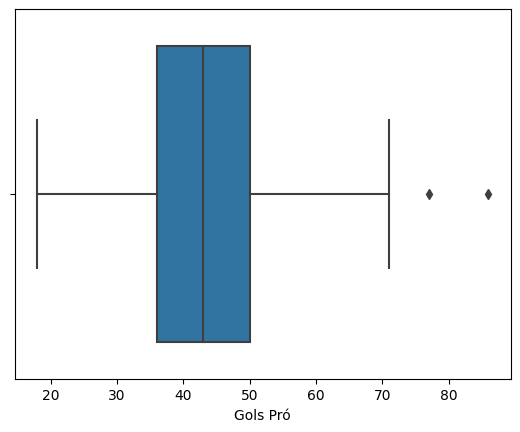

In [99]:
sns.boxplot(data=dfn, x='GP')
plt.xlabel('Gols Pró')
plt.show()

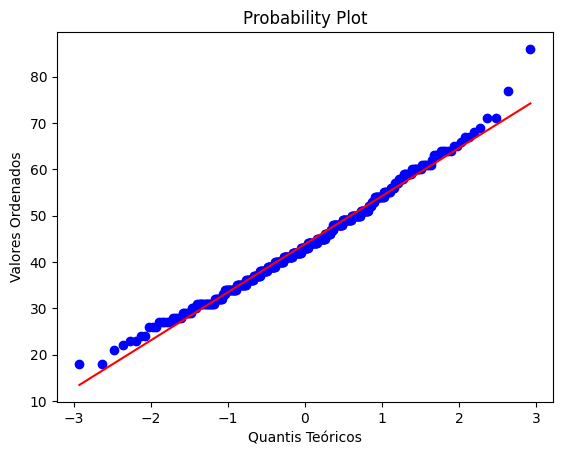

In [100]:
stats.probplot(dfn['GP'], dist='norm', plot=plt)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Valores Ordenados')
plt.show()

In [101]:
ks_test = stats.kstest(dfn['GP'], 'norm')
print('Kolmogorov-Smirnov Test:')
print('Statistic:', ks_test.statistic)
print('p-value:', ks_test.pvalue)

Kolmogorov-Smirnov Test:
Statistic: 1.0
p-value: 0.0


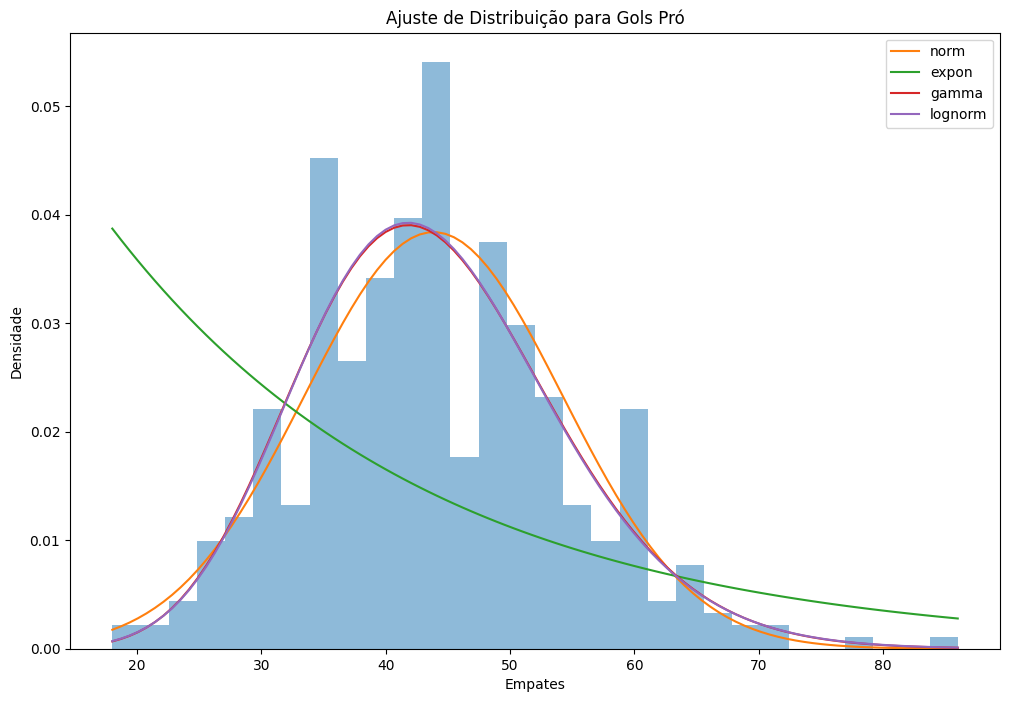

In [102]:
dist_names = ['norm', 'expon', 'gamma', 'lognorm']

best_fit_name = None
best_fit_params = {}
best_fit_distributions = []

for dist_name in dist_names:
    dist = getattr(stats, dist_name)
    params = dist.fit(dfn['GP'])
    best_fit_distributions.append(dist)
    best_fit_params[dist_name] = params

plt.figure(figsize=(12, 8))
plt.hist(dfn['GP'], bins=30, density=True, alpha=0.5)

for dist_name, params in best_fit_params.items():
    dist = best_fit_distributions[dist_names.index(dist_name)]
    x = np.linspace(dfn['GP'].min(), dfn['GP'].max(), 100)
    dist_instance = dist(*params[:-2], loc=params[-2], scale=params[-1])
    pdf = dist_instance.pdf(x)
    plt.plot(x, pdf, label=dist_name)

plt.xlabel('Empates')
plt.ylabel('Densidade')
plt.title('Ajuste de Distribuição para Gols Pró')
plt.legend()
plt.show()

##### Analisando Gols Contra

In [103]:
df['GC'].mean()

40.79772727272727

In [104]:
times_serie_a_2023 = df[(df['Serie'] == 'A') & (df['Ano'] == 2023)]['Time'].unique()

filtro = (df['Time'].isin(times_serie_a_2023)) & (df['Serie'] == 'A') & (df['Ano'] < 2023)
media_times = df[filtro].groupby('Time')['GC'].mean().sort_values(ascending=False)

for time, media in media_times.items():
    print("Time:", time)
    print("Média de Gols Contra em Anos Anteriores (Série A):", round(media, 0))
    print("---")

Time: Goiás
Média de Gols Contra em Anos Anteriores (Série A): 52.0
---
Time: Vasco da Gama
Média de Gols Contra em Anos Anteriores (Série A): 52.0
---
Time: Coritiba
Média de Gols Contra em Anos Anteriores (Série A): 48.0
---
Time: Red Bull Bragantino
Média de Gols Contra em Anos Anteriores (Série A): 48.0
---
Time: Bahia
Média de Gols Contra em Anos Anteriores (Série A): 47.0
---
Time: Botafogo
Média de Gols Contra em Anos Anteriores (Série A): 46.0
---
Time: Fluminense
Média de Gols Contra em Anos Anteriores (Série A): 45.0
---
Time: Fortaleza
Média de Gols Contra em Anos Anteriores (Série A): 44.0
---
Time: Atlético Mineiro
Média de Gols Contra em Anos Anteriores (Série A): 43.0
---
Time: Athletico Paranaense
Média de Gols Contra em Anos Anteriores (Série A): 41.0
---
Time: Flamengo
Média de Gols Contra em Anos Anteriores (Série A): 41.0
---
Time: América Fc
Média de Gols Contra em Anos Anteriores (Série A): 40.0
---
Time: São Paulo
Média de Gols Contra em Anos Anteriores (Série A)

In [105]:
times_serie_b_2023 = df[(df['Serie'] == 'B') & (df['Ano'] == 2023)]['Time'].unique()

filtro = (df['Time'].isin(times_serie_b_2023)) & (df['Serie'] == 'B') & (df['Ano'] < 2023)
media_times = df[filtro].groupby('Time')['GC'].mean().sort_values(ascending=False)

for time, media in media_times.items():
    print("Time:", time)
    print("Média de Gols Contra em Anos Anteriores (Série B):", round(media, 0))
    print("---")

Time: Abc
Média de Gols Contra em Anos Anteriores (Série B): 53.0
---
Time: Novorizontino
Média de Gols Contra em Anos Anteriores (Série B): 49.0
---
Time: Tombense
Média de Gols Contra em Anos Anteriores (Série B): 47.0
---
Time: Ceará
Média de Gols Contra em Anos Anteriores (Série B): 46.0
---
Time: Crb
Média de Gols Contra em Anos Anteriores (Série B): 45.0
---
Time: Atlético
Média de Gols Contra em Anos Anteriores (Série B): 44.0
---
Time: Juventude
Média de Gols Contra em Anos Anteriores (Série B): 43.0
---
Time: Vila Nova
Média de Gols Contra em Anos Anteriores (Série B): 42.0
---
Time: Sampaio Corrêa
Média de Gols Contra em Anos Anteriores (Série B): 42.0
---
Time: Criciúma
Média de Gols Contra em Anos Anteriores (Série B): 42.0
---
Time: Londrina
Média de Gols Contra em Anos Anteriores (Série B): 41.0
---
Time: Vitória
Média de Gols Contra em Anos Anteriores (Série B): 41.0
---
Time: Guarani
Média de Gols Contra em Anos Anteriores (Série B): 41.0
---
Time: Avaí
Média de Gols Co

In [106]:
df['GC'].median()

42.0

In [107]:
times_serie_a_2023 = df[(df['Serie'] == 'A') & (df['Ano'] == 2023)]['Time'].unique()

filtro = (df['Time'].isin(times_serie_a_2023)) & (df['Serie'] == 'A') & (df['Ano'] < 2023)
mediana_times = df[filtro].groupby('Time')['GC'].median().sort_values(ascending=False)

for time, mediana in mediana_times.items():
    print("Time:", time)
    print("Mediana de Gols Contra em Anos Anteriores (Série A):", round(mediana, 0))
    print("---")

Time: Vasco da Gama
Mediana de Gols Contra em Anos Anteriores (Série A): 51.0
---
Time: Goiás
Mediana de Gols Contra em Anos Anteriores (Série A): 51.0
---
Time: Red Bull Bragantino
Mediana de Gols Contra em Anos Anteriores (Série A): 46.0
---
Time: Fluminense
Mediana de Gols Contra em Anos Anteriores (Série A): 46.0
---
Time: Coritiba
Mediana de Gols Contra em Anos Anteriores (Série A): 45.0
---
Time: Bahia
Mediana de Gols Contra em Anos Anteriores (Série A): 45.0
---
Time: Fortaleza
Mediana de Gols Contra em Anos Anteriores (Série A): 44.0
---
Time: Botafogo
Mediana de Gols Contra em Anos Anteriores (Série A): 44.0
---
Time: Atlético Mineiro
Mediana de Gols Contra em Anos Anteriores (Série A): 44.0
---
Time: Athletico Paranaense
Mediana de Gols Contra em Anos Anteriores (Série A): 41.0
---
Time: São Paulo
Mediana de Gols Contra em Anos Anteriores (Série A): 40.0
---
Time: América Fc
Mediana de Gols Contra em Anos Anteriores (Série A): 40.0
---
Time: Cuiabá
Mediana de Gols Contra em A

In [108]:
times_serie_b_2023 = df[(df['Serie'] == 'B') & (df['Ano'] == 2023)]['Time'].unique()

filtro = (df['Time'].isin(times_serie_b_2023)) & (df['Serie'] == 'B') & (df['Ano'] < 2023)
mediana_times = df[filtro].groupby('Time')['GC'].median().sort_values(ascending=False)

for time, mediana in mediana_times.items():
    print("Time:", time)
    print("Mediana de Gols Contra em Anos Anteriores (Série B):", round(mediana, 0))
    print("---")

Time: Abc
Mediana de Gols Contra em Anos Anteriores (Série B): 54.0
---
Time: Ceará
Mediana de Gols Contra em Anos Anteriores (Série B): 50.0
---
Time: Novorizontino
Mediana de Gols Contra em Anos Anteriores (Série B): 49.0
---
Time: Atlético
Mediana de Gols Contra em Anos Anteriores (Série B): 48.0
---
Time: Tombense
Mediana de Gols Contra em Anos Anteriores (Série B): 47.0
---
Time: Crb
Mediana de Gols Contra em Anos Anteriores (Série B): 44.0
---
Time: Criciúma
Mediana de Gols Contra em Anos Anteriores (Série B): 44.0
---
Time: Vitória
Mediana de Gols Contra em Anos Anteriores (Série B): 42.0
---
Time: Juventude
Mediana de Gols Contra em Anos Anteriores (Série B): 42.0
---
Time: Sampaio Corrêa
Mediana de Gols Contra em Anos Anteriores (Série B): 42.0
---
Time: Londrina
Mediana de Gols Contra em Anos Anteriores (Série B): 42.0
---
Time: Guarani
Mediana de Gols Contra em Anos Anteriores (Série B): 40.0
---
Time: Ponte Preta
Mediana de Gols Contra em Anos Anteriores (Série B): 38.0
---

In [109]:
df['GC'].mode()[0]

46

In [110]:
times_serie_a_2023 = df[(df['Serie'] == 'A') & (df['Ano'] == 2023)]['Time'].unique()
filtro = (df['Time'].isin(times_serie_a_2023)) & (df['Serie'] == 'A') & (df['Ano'] < 2023)
moda_times = df[filtro].groupby('Time')['GC'].apply(lambda x: x.mode()[0]).sort_values(ascending=False)

for time, moda in moda_times.items():
    print("Time:", time)
    print("Moda de Gols Contra em Anos Anteriores (Série A):", moda)
    print("---")

Time: Vasco da Gama
Moda de Gols Contra em Anos Anteriores (Série A): 45
---
Time: Bahia
Moda de Gols Contra em Anos Anteriores (Série A): 43
---
Time: Coritiba
Moda de Gols Contra em Anos Anteriores (Série A): 42
---
Time: Fluminense
Moda de Gols Contra em Anos Anteriores (Série A): 42
---
Time: Goiás
Moda de Gols Contra em Anos Anteriores (Série A): 40
---
Time: Red Bull Bragantino
Moda de Gols Contra em Anos Anteriores (Série A): 40
---
Time: São Paulo
Moda de Gols Contra em Anos Anteriores (Série A): 40
---
Time: América Fc
Moda de Gols Contra em Anos Anteriores (Série A): 40
---
Time: Botafogo
Moda de Gols Contra em Anos Anteriores (Série A): 39
---
Time: Fortaleza
Moda de Gols Contra em Anos Anteriores (Série A): 39
---
Time: Atlético Mineiro
Moda de Gols Contra em Anos Anteriores (Série A): 38
---
Time: Internacional
Moda de Gols Contra em Anos Anteriores (Série A): 38
---
Time: Cuiabá
Moda de Gols Contra em Anos Anteriores (Série A): 37
---
Time: Santos
Moda de Gols Contra em A

In [111]:
times_serie_b_2023 = df[(df['Serie'] == 'B') & (df['Ano'] == 2023)]['Time'].unique()
filtro = (df['Time'].isin(times_serie_b_2023)) & (df['Serie'] == 'B') & (df['Ano'] < 2023)
moda_times = df[filtro].groupby('Time')['GC'].apply(lambda x: x.mode()[0]).sort_values(ascending=False)

for time, moda in moda_times.items():
    print("Time:", time)
    print("Moda de Gols Contra em Anos Anteriores (Série B):", moda)
    print("---")

Time: Atlético
Moda de Gols Contra em Anos Anteriores (Série B): 51
---
Time: Ceará
Moda de Gols Contra em Anos Anteriores (Série B): 50
---
Time: Novorizontino
Moda de Gols Contra em Anos Anteriores (Série B): 49
---
Time: Tombense
Moda de Gols Contra em Anos Anteriores (Série B): 47
---
Time: Criciúma
Moda de Gols Contra em Anos Anteriores (Série B): 46
---
Time: Sampaio Corrêa
Moda de Gols Contra em Anos Anteriores (Série B): 42
---
Time: Abc
Moda de Gols Contra em Anos Anteriores (Série B): 40
---
Time: Crb
Moda de Gols Contra em Anos Anteriores (Série B): 39
---
Time: Juventude
Moda de Gols Contra em Anos Anteriores (Série B): 38
---
Time: Vila Nova
Moda de Gols Contra em Anos Anteriores (Série B): 36
---
Time: Guarani
Moda de Gols Contra em Anos Anteriores (Série B): 36
---
Time: Ituano
Moda de Gols Contra em Anos Anteriores (Série B): 34
---
Time: Avaí
Moda de Gols Contra em Anos Anteriores (Série B): 32
---
Time: Vitória
Moda de Gols Contra em Anos Anteriores (Série B): 32
---


In [112]:
df['GC'].var()

174.34395837647548

In [113]:
df['GC'].std()

13.203937230102069

In [114]:
freq_table = dfn['GC'].value_counts().reset_index().sort_values('GC', ascending=False)
freq_table.columns = ['Gols Contra', 'Frequencia']

In [115]:
freq_table

,Gols Contra,Frequencia
0,46,21
2,38,20
3,40,20
1,42,20
4,49,19
5,41,18
6,39,16
7,43,15
8,45,15
9,48,15


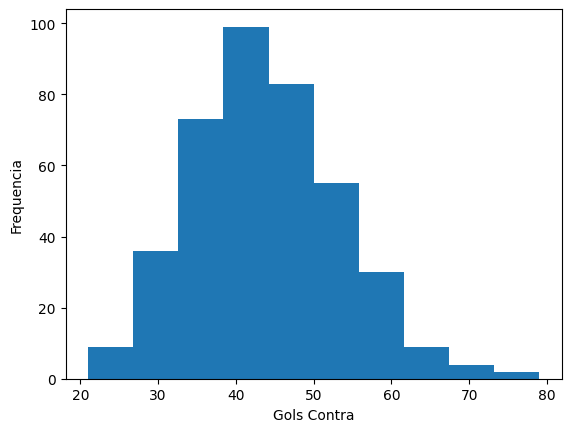

In [116]:
plt.hist(dfn['GC'], bins=10)
plt.xlabel('Gols Contra')
plt.ylabel('Frequencia')
plt.show()

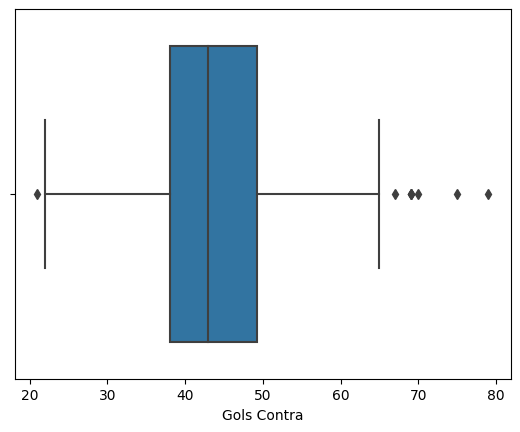

In [117]:
sns.boxplot(data=dfn, x='GC')
plt.xlabel('Gols Contra')
plt.show()

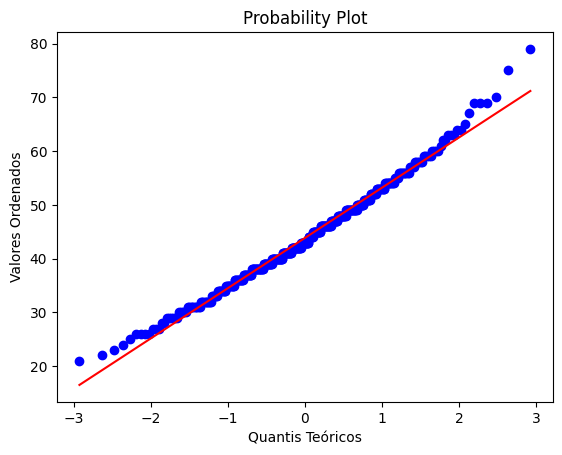

In [118]:
stats.probplot(dfn['GC'], dist='norm', plot=plt)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Valores Ordenados')
plt.show()

In [119]:
ks_test = stats.kstest(dfn['GC'], 'norm')
print('Kolmogorov-Smirnov Test:')
print('Statistic:', ks_test.statistic)
print('p-value:', ks_test.pvalue)

Kolmogorov-Smirnov Test:
Statistic: 1.0
p-value: 0.0


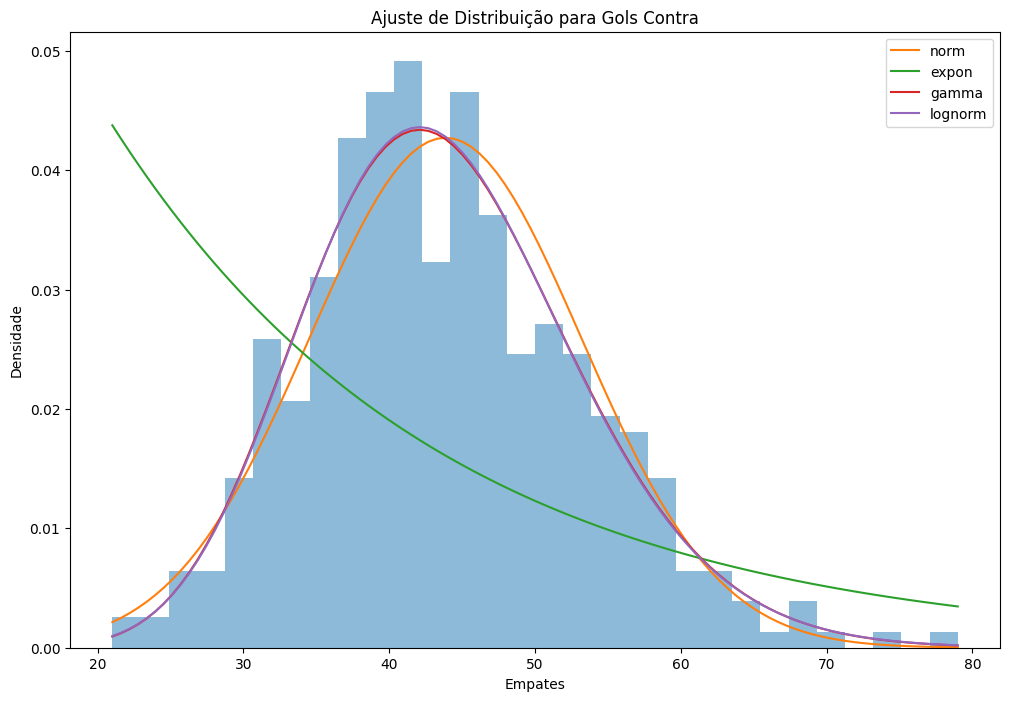

In [120]:
dist_names = ['norm', 'expon', 'gamma', 'lognorm']

best_fit_name = None
best_fit_params = {}
best_fit_distributions = []

for dist_name in dist_names:
    dist = getattr(stats, dist_name)
    params = dist.fit(dfn['GC'])
    best_fit_distributions.append(dist)
    best_fit_params[dist_name] = params

plt.figure(figsize=(12, 8))
plt.hist(dfn['GC'], bins=30, density=True, alpha=0.5)

for dist_name, params in best_fit_params.items():
    dist = best_fit_distributions[dist_names.index(dist_name)]
    x = np.linspace(dfn['GC'].min(), dfn['GC'].max(), 100)
    dist_instance = dist(*params[:-2], loc=params[-2], scale=params[-1])
    pdf = dist_instance.pdf(x)
    plt.plot(x, pdf, label=dist_name)

plt.xlabel('Empates')
plt.ylabel('Densidade')
plt.title('Ajuste de Distribuição para Gols Contra')
plt.legend()
plt.show()

##### Analisando Saldo de Gols

In [121]:
df['SG'].mean()

-0.013636363636363636

In [122]:
times_serie_a_2023 = df[(df['Serie'] == 'A') & (df['Ano'] == 2023)]['Time'].unique()

filtro = (df['Time'].isin(times_serie_a_2023)) & (df['Serie'] == 'A') & (df['Ano'] < 2023)
media_times = df[filtro].groupby('Time')['SG'].mean().sort_values(ascending=False)

for time, media in media_times.items():
    print("Time:", time)
    print("Média de Saldo de Gols em Anos Anteriores (Série A):", round(media, 0))
    print("---")

Time: Palmeiras
Média de Saldo de Gols em Anos Anteriores (Série A): 18.0
---
Time: Flamengo
Média de Saldo de Gols em Anos Anteriores (Série A): 17.0
---
Time: Atlético Mineiro
Média de Saldo de Gols em Anos Anteriores (Série A): 12.0
---
Time: Grêmio
Média de Saldo de Gols em Anos Anteriores (Série A): 12.0
---
Time: Corinthians
Média de Saldo de Gols em Anos Anteriores (Série A): 11.0
---
Time: Santos
Média de Saldo de Gols em Anos Anteriores (Série A): 10.0
---
Time: Internacional
Média de Saldo de Gols em Anos Anteriores (Série A): 10.0
---
Time: Cruzeiro
Média de Saldo de Gols em Anos Anteriores (Série A): 9.0
---
Time: Athletico Paranaense
Média de Saldo de Gols em Anos Anteriores (Série A): 8.0
---
Time: São Paulo
Média de Saldo de Gols em Anos Anteriores (Série A): 8.0
---
Time: Red Bull Bragantino
Média de Saldo de Gols em Anos Anteriores (Série A): 3.0
---
Time: Fluminense
Média de Saldo de Gols em Anos Anteriores (Série A): 2.0
---
Time: América Fc
Média de Saldo de Gols em

In [123]:
times_serie_b_2023 = df[(df['Serie'] == 'B') & (df['Ano'] == 2023)]['Time'].unique()

filtro = (df['Time'].isin(times_serie_b_2023)) & (df['Serie'] == 'B') & (df['Ano'] < 2023)
media_times = df[filtro].groupby('Time')['SG'].mean().sort_values(ascending=False)

for time, media in media_times.items():
    print("Time:", time)
    print("Média de Saldo de Gols em Anos Anteriores (Série B):", round(media, 0))
    print("---")

Time: Chapecoense
Média de Saldo de Gols em Anos Anteriores (Série B): 16.0
---
Time: Sport
Média de Saldo de Gols em Anos Anteriores (Série B): 11.0
---
Time: Botafogo
Média de Saldo de Gols em Anos Anteriores (Série B): 10.0
---
Time: Ituano
Média de Saldo de Gols em Anos Anteriores (Série B): 8.0
---
Time: Avaí
Média de Saldo de Gols em Anos Anteriores (Série B): 7.0
---
Time: Ponte Preta
Média de Saldo de Gols em Anos Anteriores (Série B): 6.0
---
Time: Atlético
Média de Saldo de Gols em Anos Anteriores (Série B): 5.0
---
Time: Ceará
Média de Saldo de Gols em Anos Anteriores (Série B): 5.0
---
Time: Vitória
Média de Saldo de Gols em Anos Anteriores (Série B): 3.0
---
Time: Sampaio Corrêa
Média de Saldo de Gols em Anos Anteriores (Série B): 2.0
---
Time: Londrina
Média de Saldo de Gols em Anos Anteriores (Série B): -0.0
---
Time: Criciúma
Média de Saldo de Gols em Anos Anteriores (Série B): -1.0
---
Time: Crb
Média de Saldo de Gols em Anos Anteriores (Série B): -2.0
---
Time: Guaran

In [124]:
df['SG'].median()

0.0

In [125]:
times_serie_a_2023 = df[(df['Serie'] == 'A') & (df['Ano'] == 2023)]['Time'].unique()

filtro = (df['Time'].isin(times_serie_a_2023)) & (df['Serie'] == 'A') & (df['Ano'] < 2023)
mediana_times = df[filtro].groupby('Time')['SG'].mean().sort_values(ascending=False)

for time, mediana in mediana_times.items():
    print("Time:", time)
    print("Mediana de Saldo de Gols em Anos Anteriores (Série A):", round(mediana))
    print("---")

Time: Palmeiras
Mediana de Saldo de Gols em Anos Anteriores (Série A): 18
---
Time: Flamengo
Mediana de Saldo de Gols em Anos Anteriores (Série A): 17
---
Time: Atlético Mineiro
Mediana de Saldo de Gols em Anos Anteriores (Série A): 12
---
Time: Grêmio
Mediana de Saldo de Gols em Anos Anteriores (Série A): 12
---
Time: Corinthians
Mediana de Saldo de Gols em Anos Anteriores (Série A): 11
---
Time: Santos
Mediana de Saldo de Gols em Anos Anteriores (Série A): 10
---
Time: Internacional
Mediana de Saldo de Gols em Anos Anteriores (Série A): 10
---
Time: Cruzeiro
Mediana de Saldo de Gols em Anos Anteriores (Série A): 9
---
Time: Athletico Paranaense
Mediana de Saldo de Gols em Anos Anteriores (Série A): 8
---
Time: São Paulo
Mediana de Saldo de Gols em Anos Anteriores (Série A): 8
---
Time: Red Bull Bragantino
Mediana de Saldo de Gols em Anos Anteriores (Série A): 3
---
Time: Fluminense
Mediana de Saldo de Gols em Anos Anteriores (Série A): 2
---
Time: América Fc
Mediana de Saldo de Gols 

In [126]:
times_serie_b_2023 = df[(df['Serie'] == 'B') & (df['Ano'] == 2023)]['Time'].unique()

filtro = (df['Time'].isin(times_serie_b_2023)) & (df['Serie'] == 'B') & (df['Ano'] < 2023)
mediana_times = df[filtro].groupby('Time')['SG'].mean().sort_values(ascending=False)

for time, mediana in mediana_times.items():
    print("Time:", time)
    print("Mediana de Saldo de Gols em Anos Anteriores (Série B):", round(mediana))
    print("---")

Time: Chapecoense
Mediana de Saldo de Gols em Anos Anteriores (Série B): 16
---
Time: Sport
Mediana de Saldo de Gols em Anos Anteriores (Série B): 11
---
Time: Botafogo
Mediana de Saldo de Gols em Anos Anteriores (Série B): 10
---
Time: Ituano
Mediana de Saldo de Gols em Anos Anteriores (Série B): 8
---
Time: Avaí
Mediana de Saldo de Gols em Anos Anteriores (Série B): 7
---
Time: Ponte Preta
Mediana de Saldo de Gols em Anos Anteriores (Série B): 6
---
Time: Atlético
Mediana de Saldo de Gols em Anos Anteriores (Série B): 5
---
Time: Ceará
Mediana de Saldo de Gols em Anos Anteriores (Série B): 5
---
Time: Vitória
Mediana de Saldo de Gols em Anos Anteriores (Série B): 3
---
Time: Sampaio Corrêa
Mediana de Saldo de Gols em Anos Anteriores (Série B): 2
---
Time: Londrina
Mediana de Saldo de Gols em Anos Anteriores (Série B): 0
---
Time: Criciúma
Mediana de Saldo de Gols em Anos Anteriores (Série B): -1
---
Time: Crb
Mediana de Saldo de Gols em Anos Anteriores (Série B): -2
---
Time: Guarani

In [127]:
df['SG'].mode()[0]

-8

In [128]:
times_serie_a_2023 = df[(df['Serie'] == 'A') & (df['Ano'] == 2023)]['Time'].unique()
filtro = (df['Time'].isin(times_serie_a_2023)) & (df['Serie'] == 'A') & (df['Ano'] < 2023)
moda_times = df[filtro].groupby('Time')['SG'].apply(lambda x: x.mode()[0]).sort_values(ascending=False)

for time, moda in moda_times.items():
    print("Time:", time)
    print("Moda de Saldo de Gols em Anos Anteriores (Série A):", moda)
    print("---")

Time: Corinthians
Moda de Saldo de Gols em Anos Anteriores (Série A): 8
---
Time: Atlético Mineiro
Moda de Saldo de Gols em Anos Anteriores (Série A): 8
---
Time: América Fc
Moda de Saldo de Gols em Anos Anteriores (Série A): 0
---
Time: Fluminense
Moda de Saldo de Gols em Anos Anteriores (Série A): 0
---
Time: São Paulo
Moda de Saldo de Gols em Anos Anteriores (Série A): -1
---
Time: Coritiba
Moda de Saldo de Gols em Anos Anteriores (Série A): -3
---
Time: Athletico Paranaense
Moda de Saldo de Gols em Anos Anteriores (Série A): -4
---
Time: Santos
Moda de Saldo de Gols em Anos Anteriores (Série A): -5
---
Time: Internacional
Moda de Saldo de Gols em Anos Anteriores (Série A): -6
---
Time: Grêmio
Moda de Saldo de Gols em Anos Anteriores (Série A): -7
---
Time: Vasco da Gama
Moda de Saldo de Gols em Anos Anteriores (Série A): -7
---
Time: Flamengo
Moda de Saldo de Gols em Anos Anteriores (Série A): -8
---
Time: Fortaleza
Moda de Saldo de Gols em Anos Anteriores (Série A): -10
---
Time: 

In [129]:
times_serie_b_2023 = df[(df['Serie'] == 'B') & (df['Ano'] == 2023)]['Time'].unique()
filtro = (df['Time'].isin(times_serie_b_2023)) & (df['Serie'] == 'B') & (df['Ano'] < 2023)
moda_times = df[filtro].groupby('Time')['SG'].apply(lambda x: x.mode()[0]).sort_values(ascending=False)

for time, moda in moda_times.items():
    print("Time:", time)
    print("Moda de Saldo de Gols em Anos Anteriores (Série B):", moda)
    print("---")

Time: Ituano
Moda de Saldo de Gols em Anos Anteriores (Série B): 8
---
Time: Sport
Moda de Saldo de Gols em Anos Anteriores (Série B): 6
---
Time: Crb
Moda de Saldo de Gols em Anos Anteriores (Série B): 1
---
Time: Sampaio Corrêa
Moda de Saldo de Gols em Anos Anteriores (Série B): -1
---
Time: Chapecoense
Moda de Saldo de Gols em Anos Anteriores (Série B): -2
---
Time: Ponte Preta
Moda de Saldo de Gols em Anos Anteriores (Série B): -2
---
Time: Avaí
Moda de Saldo de Gols em Anos Anteriores (Série B): -4
---
Time: Novorizontino
Moda de Saldo de Gols em Anos Anteriores (Série B): -5
---
Time: Criciúma
Moda de Saldo de Gols em Anos Anteriores (Série B): -5
---
Time: Vitória
Moda de Saldo de Gols em Anos Anteriores (Série B): -6
---
Time: Ceará
Moda de Saldo de Gols em Anos Anteriores (Série B): -8
---
Time: Tombense
Moda de Saldo de Gols em Anos Anteriores (Série B): -9
---
Time: Atlético
Moda de Saldo de Gols em Anos Anteriores (Série B): -10
---
Time: Guarani
Moda de Saldo de Gols em An

In [130]:
df['SG'].var()

225.74924414992762

In [131]:
df['SG'].std()

15.024954048180234

In [132]:
freq_table = dfn['SG'].value_counts().reset_index().sort_values('SG', ascending=False)
freq_table.columns = ['Saldo de Gols', 'Frequencia']

In [133]:
freq_table

,Saldo de Gols,Frequencia
0,-8,17
1,8,14
2,-1,13
3,0,12
4,-10,12
...,...,...
64,39,1
63,31,1
62,26,1
61,-37,1


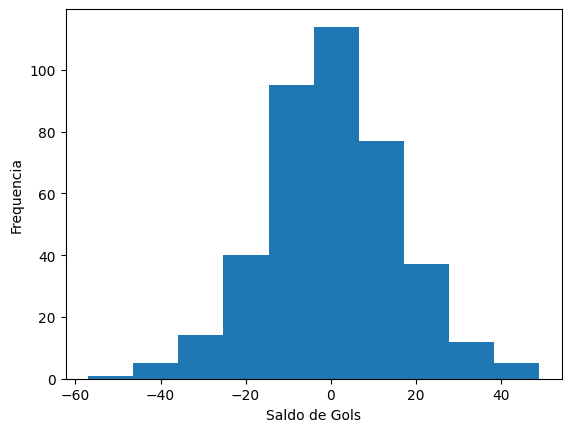

In [134]:
plt.hist(dfn['SG'], bins=10)
plt.xlabel('Saldo de Gols')
plt.ylabel('Frequencia')
plt.show()

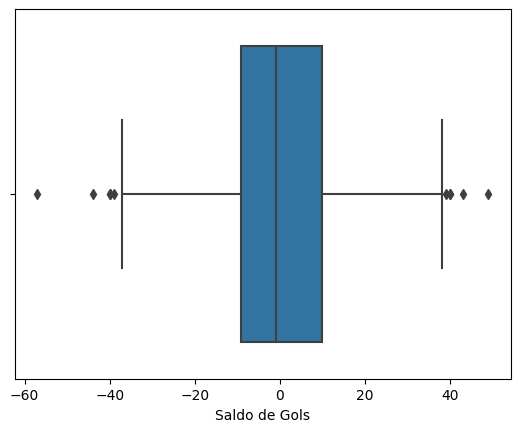

In [135]:
sns.boxplot(data=dfn, x='SG')
plt.xlabel('Saldo de Gols')
plt.show()

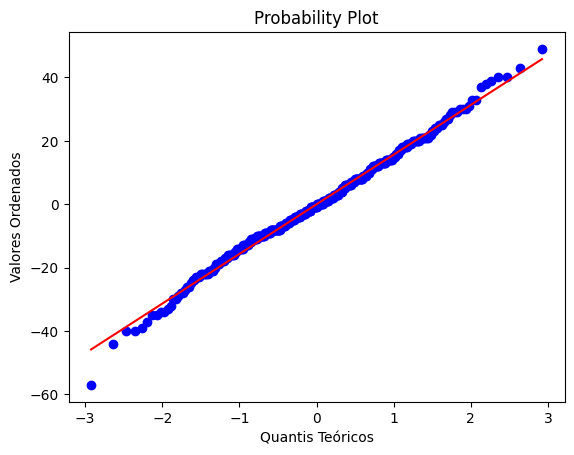

In [136]:
stats.probplot(dfn['SG'], dist='norm', plot=plt)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Valores Ordenados')
plt.show()

In [137]:
ks_test = stats.kstest(dfn['SG'], 'norm')
print('Kolmogorov-Smirnov Test:')
print('Statistic:', ks_test.statistic)
print('p-value:', ks_test.pvalue)

Kolmogorov-Smirnov Test:
Statistic: 0.44724986805182076
p-value: 1.715871995800164e-73


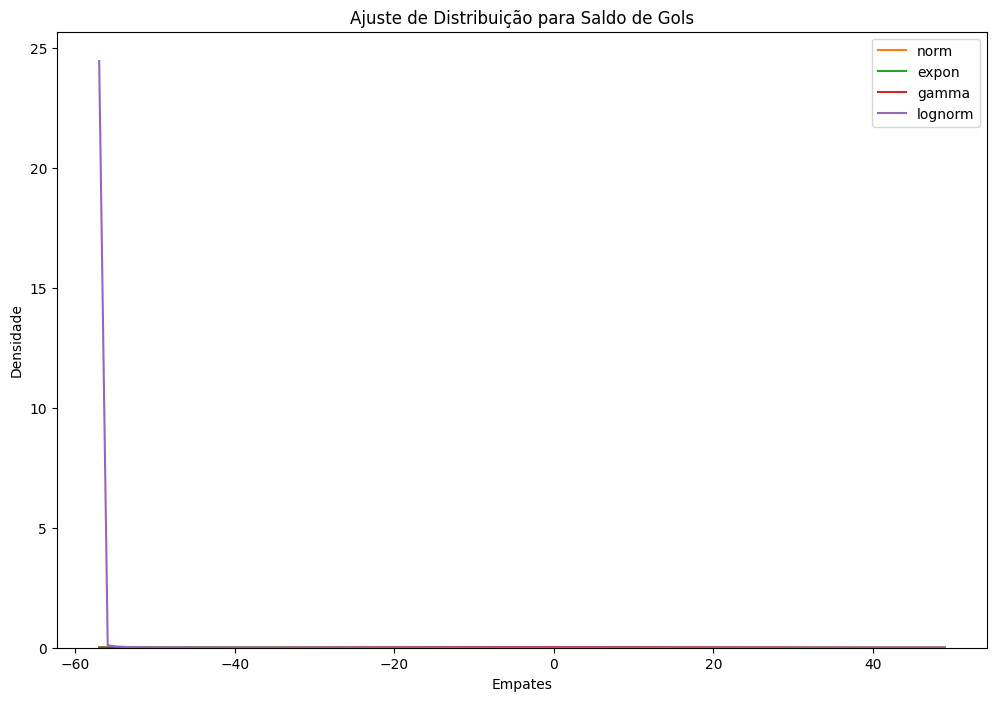

In [138]:
dist_names = ['norm', 'expon', 'gamma', 'lognorm']

best_fit_name = None
best_fit_params = {}
best_fit_distributions = []

for dist_name in dist_names:
    dist = getattr(stats, dist_name)
    params = dist.fit(dfn['SG'])
    best_fit_distributions.append(dist)
    best_fit_params[dist_name] = params

plt.figure(figsize=(12, 8))
plt.hist(dfn['SG'], bins=30, density=True, alpha=0.5)

for dist_name, params in best_fit_params.items():
    dist = best_fit_distributions[dist_names.index(dist_name)]
    x = np.linspace(dfn['SG'].min(), dfn['SG'].max(), 100)
    dist_instance = dist(*params[:-2], loc=params[-2], scale=params[-1])
    pdf = dist_instance.pdf(x)
    plt.plot(x, pdf, label=dist_name)

plt.xlabel('Empates')
plt.ylabel('Densidade')
plt.title('Ajuste de Distribuição para Saldo de Gols')
plt.legend()
plt.show()

##### Analisando Cartões Amarelos

In [139]:
df['CA'].mean()

84.83636363636364

In [140]:
times_serie_a_2023 = df[(df['Serie'] == 'A') & (df['Ano'] == 2023)]['Time'].unique()

filtro = (df['Time'].isin(times_serie_a_2023)) & (df['Serie'] == 'A') & (df['Ano'] < 2023)
media_times = df[filtro].groupby('Time')['CA'].mean().sort_values(ascending=False)

for time, media in media_times.items():
    print("Time:", time)
    print("Média de Cartões Amarelos em Anos Anteriores (Série A):", round(media, 0))
    print("---")

Time: Coritiba
Média de Cartões Amarelos em Anos Anteriores (Série A): 101.0
---
Time: Vasco da Gama
Média de Cartões Amarelos em Anos Anteriores (Série A): 100.0
---
Time: Internacional
Média de Cartões Amarelos em Anos Anteriores (Série A): 97.0
---
Time: Goiás
Média de Cartões Amarelos em Anos Anteriores (Série A): 92.0
---
Time: Palmeiras
Média de Cartões Amarelos em Anos Anteriores (Série A): 92.0
---
Time: Red Bull Bragantino
Média de Cartões Amarelos em Anos Anteriores (Série A): 90.0
---
Time: São Paulo
Média de Cartões Amarelos em Anos Anteriores (Série A): 89.0
---
Time: Santos
Média de Cartões Amarelos em Anos Anteriores (Série A): 89.0
---
Time: Botafogo
Média de Cartões Amarelos em Anos Anteriores (Série A): 89.0
---
Time: Athletico Paranaense
Média de Cartões Amarelos em Anos Anteriores (Série A): 88.0
---
Time: Bahia
Média de Cartões Amarelos em Anos Anteriores (Série A): 88.0
---
Time: América Fc
Média de Cartões Amarelos em Anos Anteriores (Série A): 88.0
---
Time: For

In [141]:
times_serie_b_2023 = df[(df['Serie'] == 'B') & (df['Ano'] == 2023)]['Time'].unique()

filtro = (df['Time'].isin(times_serie_b_2023)) & (df['Serie'] == 'B') & (df['Ano'] < 2023)
media_times = df[filtro].groupby('Time')['CA'].mean().sort_values(ascending=False)

for time, media in media_times.items():
    print("Time:", time)
    print("Média de Cartões Amarelos em Anos Anteriores (Série B):", round(media, 0))
    print("---")

Time: Novorizontino
Média de Cartões Amarelos em Anos Anteriores (Série B): 108.0
---
Time: Juventude
Média de Cartões Amarelos em Anos Anteriores (Série B): 103.0
---
Time: Londrina
Média de Cartões Amarelos em Anos Anteriores (Série B): 101.0
---
Time: Abc
Média de Cartões Amarelos em Anos Anteriores (Série B): 100.0
---
Time: Criciúma
Média de Cartões Amarelos em Anos Anteriores (Série B): 100.0
---
Time: Ceará
Média de Cartões Amarelos em Anos Anteriores (Série B): 96.0
---
Time: Ituano
Média de Cartões Amarelos em Anos Anteriores (Série B): 95.0
---
Time: Vitória
Média de Cartões Amarelos em Anos Anteriores (Série B): 95.0
---
Time: Crb
Média de Cartões Amarelos em Anos Anteriores (Série B): 95.0
---
Time: Chapecoense
Média de Cartões Amarelos em Anos Anteriores (Série B): 94.0
---
Time: Sampaio Corrêa
Média de Cartões Amarelos em Anos Anteriores (Série B): 94.0
---
Time: Guarani
Média de Cartões Amarelos em Anos Anteriores (Série B): 93.0
---
Time: Avaí
Média de Cartões Amarelos 

In [142]:
df['CA'].median()

89.5

In [9]:
times_serie_a_2023 = df[(df['Serie'] == 'A') & (df['Ano'] == 2023)]['Time'].unique()

filtro = (df['Time'].isin(times_serie_a_2023)) & (df['Serie'] == 'A') & (df['Ano'] < 2023)
mediana_times = df[filtro].groupby('Time')['CA'].median().sort_values(ascending=False)

for time, mediana in mediana_times.items():
    print("Time:", time)
    print("Mediana de Cartões Amarelos em Anos Anteriores (Série A):", round(mediana, 0))
    print("---")

Time: Vasco da Gama
Mediana de Cartões Amarelos em Anos Anteriores (Série A): 103.0
---
Time: Coritiba
Mediana de Cartões Amarelos em Anos Anteriores (Série A): 101.0
---
Time: Internacional
Mediana de Cartões Amarelos em Anos Anteriores (Série A): 96.0
---
Time: Red Bull Bragantino
Mediana de Cartões Amarelos em Anos Anteriores (Série A): 93.0
---
Time: Botafogo
Mediana de Cartões Amarelos em Anos Anteriores (Série A): 92.0
---
Time: Palmeiras
Mediana de Cartões Amarelos em Anos Anteriores (Série A): 91.0
---
Time: São Paulo
Mediana de Cartões Amarelos em Anos Anteriores (Série A): 90.0
---
Time: Bahia
Mediana de Cartões Amarelos em Anos Anteriores (Série A): 90.0
---
Time: Athletico Paranaense
Mediana de Cartões Amarelos em Anos Anteriores (Série A): 89.0
---
Time: América Fc
Mediana de Cartões Amarelos em Anos Anteriores (Série A): 88.0
---
Time: Goiás
Mediana de Cartões Amarelos em Anos Anteriores (Série A): 88.0
---
Time: Cruzeiro
Mediana de Cartões Amarelos em Anos Anteriores (Sé

In [144]:
times_serie_b_2023 = df[(df['Serie'] == 'B') & (df['Ano'] == 2023)]['Time'].unique()

filtro = (df['Time'].isin(times_serie_b_2023)) & (df['Serie'] == 'B') & (df['Ano'] < 2023)
mediana_times = df[filtro].groupby('Time')['CA'].median().sort_values(ascending=False)

for time, mediana in media_times.items():
    print("Time:", time)
    print("Mediana de Cartões Amarelos em Anos Anteriores (Série B):", round(mediana, 0))
    print("---")

Time: Novorizontino
Mediana de Cartões Amarelos em Anos Anteriores (Série B): 108.0
---
Time: Juventude
Mediana de Cartões Amarelos em Anos Anteriores (Série B): 103.0
---
Time: Londrina
Mediana de Cartões Amarelos em Anos Anteriores (Série B): 101.0
---
Time: Abc
Mediana de Cartões Amarelos em Anos Anteriores (Série B): 100.0
---
Time: Criciúma
Mediana de Cartões Amarelos em Anos Anteriores (Série B): 100.0
---
Time: Ceará
Mediana de Cartões Amarelos em Anos Anteriores (Série B): 96.0
---
Time: Ituano
Mediana de Cartões Amarelos em Anos Anteriores (Série B): 95.0
---
Time: Vitória
Mediana de Cartões Amarelos em Anos Anteriores (Série B): 95.0
---
Time: Crb
Mediana de Cartões Amarelos em Anos Anteriores (Série B): 95.0
---
Time: Chapecoense
Mediana de Cartões Amarelos em Anos Anteriores (Série B): 94.0
---
Time: Sampaio Corrêa
Mediana de Cartões Amarelos em Anos Anteriores (Série B): 94.0
---
Time: Guarani
Mediana de Cartões Amarelos em Anos Anteriores (Série B): 93.0
---
Time: Avaí
Me

In [145]:
df['CA'].mode()[0]

90

In [146]:
times_serie_a_2023 = df[(df['Serie'] == 'A') & (df['Ano'] == 2023)]['Time'].unique()
filtro = (df['Time'].isin(times_serie_a_2023)) & (df['Serie'] == 'A') & (df['Ano'] < 2023)
moda_times = df[filtro].groupby('Time')['CA'].apply(lambda x: x.mode()[0]).sort_values(ascending=False)

for time, moda in moda_times.items():
    print("Time:", time)
    print("Moda de Cartões Amarelos em Anos Anteriores (Série A):", moda)
    print("---")

Time: Goiás
Moda de Cartões Amarelos em Anos Anteriores (Série A): 117
---
Time: Coritiba
Moda de Cartões Amarelos em Anos Anteriores (Série A): 113
---
Time: Vasco da Gama
Moda de Cartões Amarelos em Anos Anteriores (Série A): 105
---
Time: Internacional
Moda de Cartões Amarelos em Anos Anteriores (Série A): 98
---
Time: Grêmio
Moda de Cartões Amarelos em Anos Anteriores (Série A): 95
---
Time: Bahia
Moda de Cartões Amarelos em Anos Anteriores (Série A): 94
---
Time: Botafogo
Moda de Cartões Amarelos em Anos Anteriores (Série A): 94
---
Time: América Fc
Moda de Cartões Amarelos em Anos Anteriores (Série A): 88
---
Time: Palmeiras
Moda de Cartões Amarelos em Anos Anteriores (Série A): 87
---
Time: São Paulo
Moda de Cartões Amarelos em Anos Anteriores (Série A): 87
---
Time: Fluminense
Moda de Cartões Amarelos em Anos Anteriores (Série A): 85
---
Time: Cuiabá
Moda de Cartões Amarelos em Anos Anteriores (Série A): 82
---
Time: Flamengo
Moda de Cartões Amarelos em Anos Anteriores (Série A

In [147]:
times_serie_b_2023 = df[(df['Serie'] == 'B') & (df['Ano'] == 2023)]['Time'].unique()
filtro = (df['Time'].isin(times_serie_b_2023)) & (df['Serie'] == 'B') & (df['Ano'] < 2023)
moda_times = df[filtro].groupby('Time')['CA'].apply(lambda x: x.mode()[0]).sort_values(ascending=False)

for time, moda in moda_times.items():
    print("Time:", time)
    print("Moda de Cartões Amarelos em Anos Anteriores (Série B):", moda)
    print("---")

Time: Londrina
Moda de Cartões Amarelos em Anos Anteriores (Série B): 114
---
Time: Novorizontino
Moda de Cartões Amarelos em Anos Anteriores (Série B): 108
---
Time: Ceará
Moda de Cartões Amarelos em Anos Anteriores (Série B): 107
---
Time: Guarani
Moda de Cartões Amarelos em Anos Anteriores (Série B): 100
---
Time: Ituano
Moda de Cartões Amarelos em Anos Anteriores (Série B): 95
---
Time: Vitória
Moda de Cartões Amarelos em Anos Anteriores (Série B): 92
---
Time: Juventude
Moda de Cartões Amarelos em Anos Anteriores (Série B): 90
---
Time: Abc
Moda de Cartões Amarelos em Anos Anteriores (Série B): 88
---
Time: Criciúma
Moda de Cartões Amarelos em Anos Anteriores (Série B): 86
---
Time: Sport
Moda de Cartões Amarelos em Anos Anteriores (Série B): 86
---
Time: Chapecoense
Moda de Cartões Amarelos em Anos Anteriores (Série B): 85
---
Time: Tombense
Moda de Cartões Amarelos em Anos Anteriores (Série B): 85
---
Time: Crb
Moda de Cartões Amarelos em Anos Anteriores (Série B): 84
---
Time: 

In [148]:
df['CA'].var()

524.9298819631395

In [149]:
df['CA'].std()

22.9113483226793

In [150]:
freq_table = dfn['CA'].value_counts().reset_index().sort_values('CA', ascending=False)
freq_table.columns = ['Cartões Amarelos', 'Frequencia']

In [151]:
freq_table

,Cartões Amarelos,Frequencia
0,90,19
1,95,18
2,85,14
3,87,14
4,94,14
...,...,...
57,56,1
56,128,1
55,62,1
53,68,1


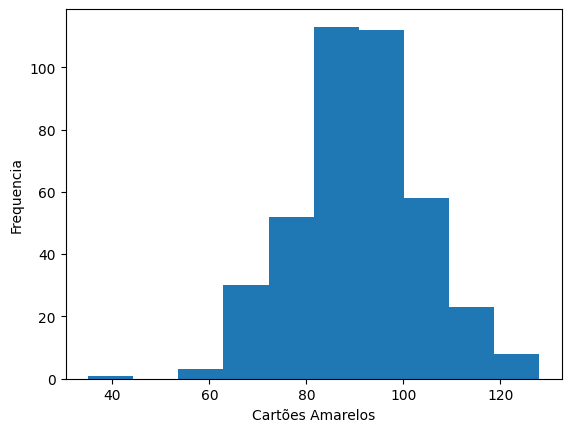

In [152]:
plt.hist(dfn['CA'], bins=10)
plt.xlabel('Cartões Amarelos')
plt.ylabel('Frequencia')
plt.show()

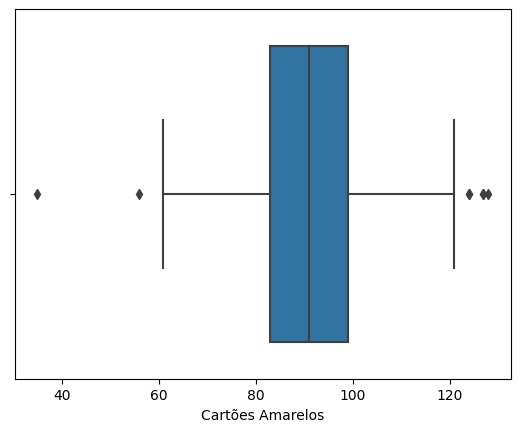

In [153]:
sns.boxplot(data=dfn, x='CA')
plt.xlabel('Cartões Amarelos')
plt.show()

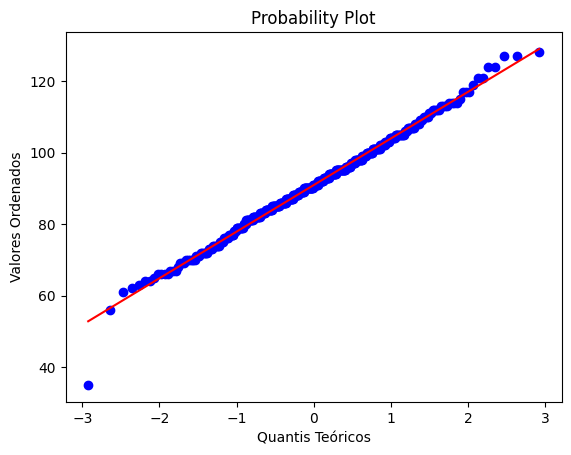

In [154]:
stats.probplot(dfn['CA'], dist='norm', plot=plt)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Valores Ordenados')
plt.show()

In [155]:
ks_test = stats.kstest(dfn['CA'], 'norm')
print('Kolmogorov-Smirnov Test:')
print('Statistic:', ks_test.statistic)
print('p-value:', ks_test.pvalue)

Kolmogorov-Smirnov Test:
Statistic: 1.0
p-value: 0.0


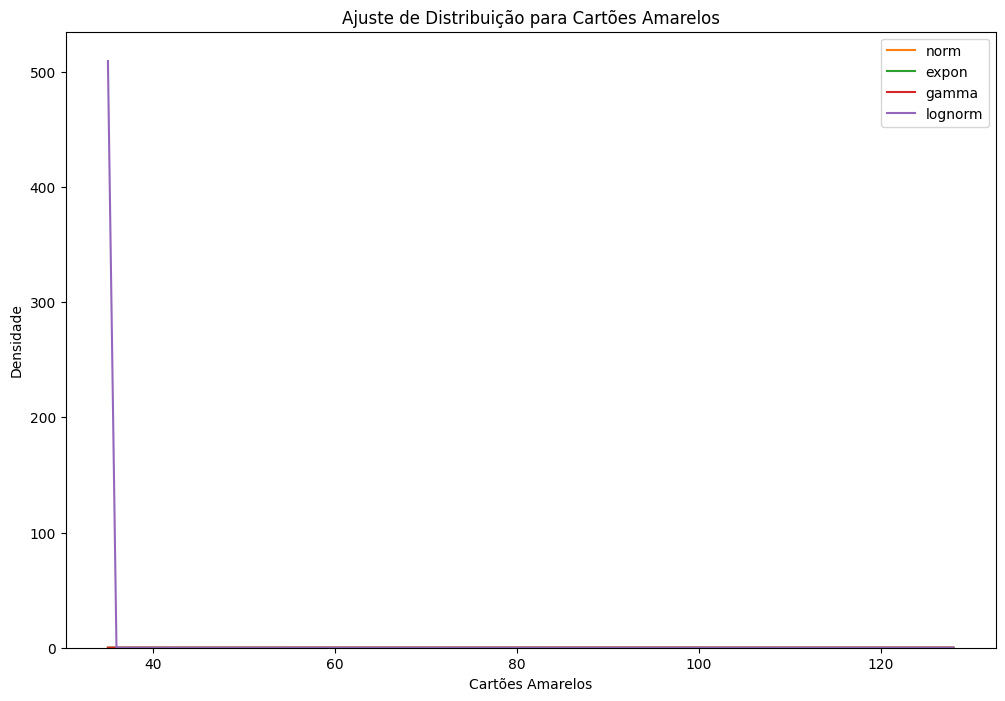

In [156]:
dist_names = ['norm', 'expon', 'gamma', 'lognorm']

best_fit_name = None
best_fit_params = {}
best_fit_distributions = []

for dist_name in dist_names:
    dist = getattr(stats, dist_name)
    params = dist.fit(dfn['CA'])
    best_fit_distributions.append(dist)
    best_fit_params[dist_name] = params

plt.figure(figsize=(12, 8))
plt.hist(dfn['CA'], bins=30, density=True, alpha=0.5)

for dist_name, params in best_fit_params.items():
    dist = best_fit_distributions[dist_names.index(dist_name)]
    x = np.linspace(dfn['CA'].min(), dfn['CA'].max(), 100)
    dist_instance = dist(*params[:-2], loc=params[-2], scale=params[-1])
    pdf = dist_instance.pdf(x)
    plt.plot(x, pdf, label=dist_name)

plt.xlabel('Cartões Amarelos')
plt.ylabel('Densidade')
plt.title('Ajuste de Distribuição para Cartões Amarelos')
plt.legend()
plt.show()

##### Analisando Cartões Vermelhos

In [157]:
df['CV'].mean()

5.165909090909091

In [158]:
times_serie_a_2023 = df[(df['Serie'] == 'A') & (df['Ano'] == 2023)]['Time'].unique()

filtro = (df['Time'].isin(times_serie_a_2023)) & (df['Serie'] == 'A') & (df['Ano'] < 2023)
media_times = df[filtro].groupby('Time')['CV'].mean().sort_values(ascending=False)

for time, media in media_times.items():
    print("Time:", time)
    print("Média de Cartões Vermelhos em Anos Anteriores (Série A):", round(media, 0))
    print("---")

Time: Fortaleza
Média de Cartões Vermelhos em Anos Anteriores (Série A): 10.0
---
Time: Cuiabá
Média de Cartões Vermelhos em Anos Anteriores (Série A): 9.0
---
Time: Fluminense
Média de Cartões Vermelhos em Anos Anteriores (Série A): 7.0
---
Time: Vasco da Gama
Média de Cartões Vermelhos em Anos Anteriores (Série A): 6.0
---
Time: Internacional
Média de Cartões Vermelhos em Anos Anteriores (Série A): 6.0
---
Time: Bahia
Média de Cartões Vermelhos em Anos Anteriores (Série A): 6.0
---
Time: São Paulo
Média de Cartões Vermelhos em Anos Anteriores (Série A): 6.0
---
Time: Coritiba
Média de Cartões Vermelhos em Anos Anteriores (Série A): 6.0
---
Time: Santos
Média de Cartões Vermelhos em Anos Anteriores (Série A): 6.0
---
Time: Palmeiras
Média de Cartões Vermelhos em Anos Anteriores (Série A): 5.0
---
Time: Goiás
Média de Cartões Vermelhos em Anos Anteriores (Série A): 5.0
---
Time: América Fc
Média de Cartões Vermelhos em Anos Anteriores (Série A): 5.0
---
Time: Cruzeiro
Média de Cartões 

In [159]:
times_serie_b_2023 = df[(df['Serie'] == 'B') & (df['Ano'] == 2023)]['Time'].unique()

filtro = (df['Time'].isin(times_serie_b_2023)) & (df['Serie'] == 'B') & (df['Ano'] < 2023)
media_times = df[filtro].groupby('Time')['CV'].mean().sort_values(ascending=False)

for time, media in media_times.items():
    print("Time:", time)
    print("Média de Cartões Vermelhos em Anos Anteriores (Série B):", round(media, 0))
    print("---")

Time: Sport
Média de Cartões Vermelhos em Anos Anteriores (Série B): 9.0
---
Time: Ceará
Média de Cartões Vermelhos em Anos Anteriores (Série B): 7.0
---
Time: Guarani
Média de Cartões Vermelhos em Anos Anteriores (Série B): 7.0
---
Time: Crb
Média de Cartões Vermelhos em Anos Anteriores (Série B): 7.0
---
Time: Ponte Preta
Média de Cartões Vermelhos em Anos Anteriores (Série B): 6.0
---
Time: Vitória
Média de Cartões Vermelhos em Anos Anteriores (Série B): 6.0
---
Time: Londrina
Média de Cartões Vermelhos em Anos Anteriores (Série B): 6.0
---
Time: Ituano
Média de Cartões Vermelhos em Anos Anteriores (Série B): 6.0
---
Time: Chapecoense
Média de Cartões Vermelhos em Anos Anteriores (Série B): 6.0
---
Time: Vila Nova
Média de Cartões Vermelhos em Anos Anteriores (Série B): 6.0
---
Time: Sampaio Corrêa
Média de Cartões Vermelhos em Anos Anteriores (Série B): 6.0
---
Time: Criciúma
Média de Cartões Vermelhos em Anos Anteriores (Série B): 5.0
---
Time: Botafogo
Média de Cartões Vermelhos 

In [160]:
df['CV'].median()

5.0

In [10]:
times_serie_a_2023 = df[(df['Serie'] == 'A') & (df['Ano'] == 2023)]['Time'].unique()

filtro = (df['Time'].isin(times_serie_a_2023)) & (df['Serie'] == 'A') & (df['Ano'] < 2023)
mediana_times = df[filtro].groupby('Time')['CV'].median().sort_values(ascending=False)

for time, mediana in mediana_times.items():
    print("Time:", time)
    print("Mediana de Cartões Vermelhos em Anos Anteriores (Série A):", round(mediana, 0))
    print("---")

Time: Fortaleza
Mediana de Cartões Vermelhos em Anos Anteriores (Série A): 10.0
---
Time: Cuiabá
Mediana de Cartões Vermelhos em Anos Anteriores (Série A): 9.0
---
Time: Bahia
Mediana de Cartões Vermelhos em Anos Anteriores (Série A): 7.0
---
Time: Vasco da Gama
Mediana de Cartões Vermelhos em Anos Anteriores (Série A): 6.0
---
Time: Internacional
Mediana de Cartões Vermelhos em Anos Anteriores (Série A): 6.0
---
Time: São Paulo
Mediana de Cartões Vermelhos em Anos Anteriores (Série A): 6.0
---
Time: Goiás
Mediana de Cartões Vermelhos em Anos Anteriores (Série A): 6.0
---
Time: Athletico Paranaense
Mediana de Cartões Vermelhos em Anos Anteriores (Série A): 5.0
---
Time: Palmeiras
Mediana de Cartões Vermelhos em Anos Anteriores (Série A): 5.0
---
Time: América Fc
Mediana de Cartões Vermelhos em Anos Anteriores (Série A): 5.0
---
Time: Cruzeiro
Mediana de Cartões Vermelhos em Anos Anteriores (Série A): 5.0
---
Time: Coritiba
Mediana de Cartões Vermelhos em Anos Anteriores (Série A): 5.0


In [162]:
times_serie_b_2023 = df[(df['Serie'] == 'B') & (df['Ano'] == 2023)]['Time'].unique()

filtro = (df['Time'].isin(times_serie_b_2023)) & (df['Serie'] == 'B') & (df['Ano'] < 2023)
mediana_times = df[filtro].groupby('Time')['CV'].median().sort_values(ascending=False)

for time, mediana in mediana_times.items():
    print("Time:", time)
    print("Mediana de Cartões Vermelhos em Anos Anteriores (Série B):", round(mediana, 0))
    print("---")

Time: Sport
Mediana de Cartões Vermelhos em Anos Anteriores (Série B): 9.0
---
Time: Ponte Preta
Mediana de Cartões Vermelhos em Anos Anteriores (Série B): 7.0
---
Time: Vitória
Mediana de Cartões Vermelhos em Anos Anteriores (Série B): 6.0
---
Time: Crb
Mediana de Cartões Vermelhos em Anos Anteriores (Série B): 6.0
---
Time: Londrina
Mediana de Cartões Vermelhos em Anos Anteriores (Série B): 6.0
---
Time: Ituano
Mediana de Cartões Vermelhos em Anos Anteriores (Série B): 6.0
---
Time: Chapecoense
Mediana de Cartões Vermelhos em Anos Anteriores (Série B): 6.0
---
Time: Ceará
Mediana de Cartões Vermelhos em Anos Anteriores (Série B): 6.0
---
Time: Avaí
Mediana de Cartões Vermelhos em Anos Anteriores (Série B): 6.0
---
Time: Botafogo
Mediana de Cartões Vermelhos em Anos Anteriores (Série B): 6.0
---
Time: Sampaio Corrêa
Mediana de Cartões Vermelhos em Anos Anteriores (Série B): 6.0
---
Time: Guarani
Mediana de Cartões Vermelhos em Anos Anteriores (Série B): 5.0
---
Time: Atlético
Mediana 

In [163]:
df['CV'].mode()[0]

5

In [164]:
times_serie_a_2023 = df[(df['Serie'] == 'A') & (df['Ano'] == 2023)]['Time'].unique()
filtro = (df['Time'].isin(times_serie_a_2023)) & (df['Serie'] == 'A') & (df['Ano'] < 2023)
moda_times = df[filtro].groupby('Time')['CV'].apply(lambda x: x.mode()[0]).sort_values(ascending=False)

for time, moda in moda_times.items():
    print("Time:", time)
    print("Moda de Cartões Vermelhos em Anos Anteriores (Série A):", moda)
    print("---")

Time: Cuiabá
Moda de Cartões Vermelhos em Anos Anteriores (Série A): 7
---
Time: Bahia
Moda de Cartões Vermelhos em Anos Anteriores (Série A): 7
---
Time: Fortaleza
Moda de Cartões Vermelhos em Anos Anteriores (Série A): 7
---
Time: Internacional
Moda de Cartões Vermelhos em Anos Anteriores (Série A): 6
---
Time: América Fc
Moda de Cartões Vermelhos em Anos Anteriores (Série A): 5
---
Time: Palmeiras
Moda de Cartões Vermelhos em Anos Anteriores (Série A): 5
---
Time: Athletico Paranaense
Moda de Cartões Vermelhos em Anos Anteriores (Série A): 5
---
Time: Fluminense
Moda de Cartões Vermelhos em Anos Anteriores (Série A): 5
---
Time: Flamengo
Moda de Cartões Vermelhos em Anos Anteriores (Série A): 4
---
Time: Coritiba
Moda de Cartões Vermelhos em Anos Anteriores (Série A): 4
---
Time: Santos
Moda de Cartões Vermelhos em Anos Anteriores (Série A): 4
---
Time: São Paulo
Moda de Cartões Vermelhos em Anos Anteriores (Série A): 4
---
Time: Corinthians
Moda de Cartões Vermelhos em Anos Anterio

In [165]:
times_serie_b_2023 = df[(df['Serie'] == 'B') & (df['Ano'] == 2023)]['Time'].unique()
filtro = (df['Time'].isin(times_serie_b_2023)) & (df['Serie'] == 'B') & (df['Ano'] < 2023)
moda_times = df[filtro].groupby('Time')['CV'].apply(lambda x: x.mode()[0]).sort_values(ascending=False)

for time, moda in moda_times.items():
    print("Time:", time)
    print("Moda de Cartões Vermelhos em Anos Anteriores (Série B):", moda)
    print("---")

Time: Vitória
Moda de Cartões Vermelhos em Anos Anteriores (Série B): 8
---
Time: Ponte Preta
Moda de Cartões Vermelhos em Anos Anteriores (Série B): 7
---
Time: Crb
Moda de Cartões Vermelhos em Anos Anteriores (Série B): 7
---
Time: Chapecoense
Moda de Cartões Vermelhos em Anos Anteriores (Série B): 6
---
Time: Sport
Moda de Cartões Vermelhos em Anos Anteriores (Série B): 6
---
Time: Ituano
Moda de Cartões Vermelhos em Anos Anteriores (Série B): 6
---
Time: Botafogo
Moda de Cartões Vermelhos em Anos Anteriores (Série B): 6
---
Time: Atlético
Moda de Cartões Vermelhos em Anos Anteriores (Série B): 5
---
Time: Novorizontino
Moda de Cartões Vermelhos em Anos Anteriores (Série B): 5
---
Time: Ceará
Moda de Cartões Vermelhos em Anos Anteriores (Série B): 4
---
Time: Guarani
Moda de Cartões Vermelhos em Anos Anteriores (Série B): 4
---
Time: Criciúma
Moda de Cartões Vermelhos em Anos Anteriores (Série B): 3
---
Time: Juventude
Moda de Cartões Vermelhos em Anos Anteriores (Série B): 3
---
Ti

In [166]:
df['CV'].var()

8.106807827707593

In [167]:
df['CV'].std()

2.847245656368202

In [168]:
freq_table = dfn['CV'].value_counts().reset_index().sort_values('CV', ascending=False)
freq_table.columns = ['Cartões Vermelhos', 'Frequencia']

In [169]:
freq_table

,Cartões Vermelhos,Frequencia
0,5,62
1,4,58
2,6,58
3,3,52
4,7,40
5,2,32
6,8,28
7,9,19
8,10,14
9,11,13


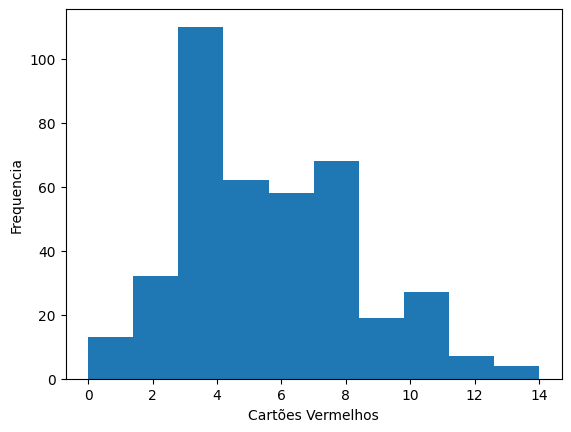

In [170]:
plt.hist(dfn['CV'], bins=10)
plt.xlabel('Cartões Vermelhos')
plt.ylabel('Frequencia')
plt.show()

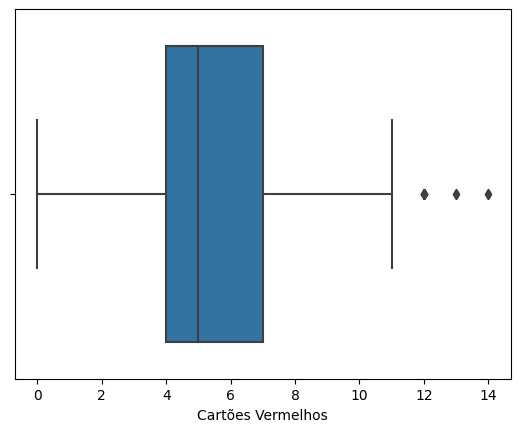

In [171]:
sns.boxplot(data=dfn, x='CV')
plt.xlabel('Cartões Vermelhos')
plt.show()

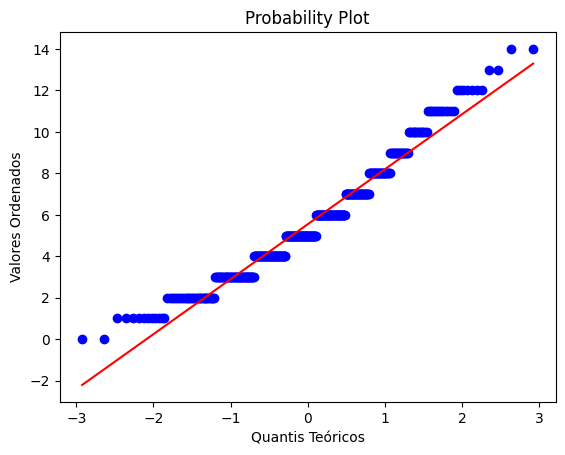

In [172]:
stats.probplot(dfn['CV'], dist='norm', plot=plt)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Valores Ordenados')
plt.show()

In [173]:
ks_test = stats.kstest(dfn['CV'], 'norm')
print('Kolmogorov-Smirnov Test:')
print('Statistic:', ks_test.statistic)
print('p-value:', ks_test.pvalue)

Kolmogorov-Smirnov Test:
Statistic: 0.9447498680518208
p-value: 0.0


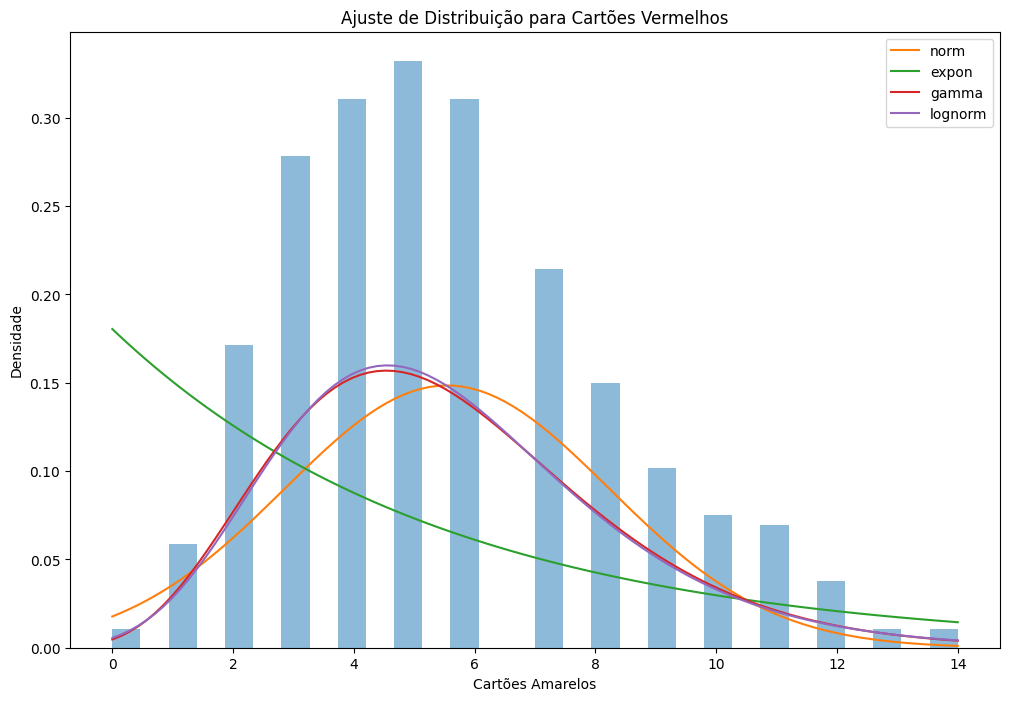

In [174]:
dist_names = ['norm', 'expon', 'gamma', 'lognorm']

best_fit_name = None
best_fit_params = {}
best_fit_distributions = []

for dist_name in dist_names:
    dist = getattr(stats, dist_name)
    params = dist.fit(dfn['CV'])
    best_fit_distributions.append(dist)
    best_fit_params[dist_name] = params

plt.figure(figsize=(12, 8))
plt.hist(dfn['CV'], bins=30, density=True, alpha=0.5)

for dist_name, params in best_fit_params.items():
    dist = best_fit_distributions[dist_names.index(dist_name)]
    x = np.linspace(dfn['CV'].min(), dfn['CV'].max(), 100)
    dist_instance = dist(*params[:-2], loc=params[-2], scale=params[-1])
    pdf = dist_instance.pdf(x)
    plt.plot(x, pdf, label=dist_name)

plt.xlabel('Cartões Amarelos')
plt.ylabel('Densidade')
plt.title('Ajuste de Distribuição para Cartões Vermelhos')
plt.legend()
plt.show()

##### Analisando Aproveitamento

In [175]:
df['%'].mean()

44.95

In [176]:
times_serie_a_2023 = df[(df['Serie'] == 'A') & (df['Ano'] == 2023)]['Time'].unique()

filtro = (df['Time'].isin(times_serie_a_2023)) & (df['Serie'] == 'A') & (df['Ano'] < 2023)
media_times = df[filtro].groupby('Time')['CV'].mean().sort_values(ascending=False)

for time, media in media_times.items():
    print("Time:", time)
    print("Média de Aproveitamento em Anos Anteriores (Série A):",media)
    print("---")

Time: Fortaleza
Média de Aproveitamento em Anos Anteriores (Série A): 9.75
---
Time: Cuiabá
Média de Aproveitamento em Anos Anteriores (Série A): 9.0
---
Time: Fluminense
Média de Aproveitamento em Anos Anteriores (Série A): 6.7
---
Time: Vasco da Gama
Média de Aproveitamento em Anos Anteriores (Série A): 6.5
---
Time: Internacional
Média de Aproveitamento em Anos Anteriores (Série A): 6.444444444444445
---
Time: Bahia
Média de Aproveitamento em Anos Anteriores (Série A): 6.285714285714286
---
Time: São Paulo
Média de Aproveitamento em Anos Anteriores (Série A): 5.9
---
Time: Coritiba
Média de Aproveitamento em Anos Anteriores (Série A): 5.714285714285714
---
Time: Santos
Média de Aproveitamento em Anos Anteriores (Série A): 5.6
---
Time: Palmeiras
Média de Aproveitamento em Anos Anteriores (Série A): 5.333333333333333
---
Time: Goiás
Média de Aproveitamento em Anos Anteriores (Série A): 5.166666666666667
---
Time: América Fc
Média de Aproveitamento em Anos Anteriores (Série A): 5.0
--

In [177]:
times_serie_b_2023 = df[(df['Serie'] == 'B') & (df['Ano'] == 2023)]['Time'].unique()

filtro = (df['Time'].isin(times_serie_b_2023)) & (df['Serie'] == 'B') & (df['Ano'] < 2023)
media_times = df[filtro].groupby('Time')['CV'].mean().sort_values(ascending=False)

for time, media in media_times.items():
    print("Time:", time)
    print("Média de Aproveitamento em Anos Anteriores (Série B):",media)
    print("---")

Time: Sport
Média de Aproveitamento em Anos Anteriores (Série B): 8.666666666666666
---
Time: Ceará
Média de Aproveitamento em Anos Anteriores (Série B): 7.0
---
Time: Guarani
Média de Aproveitamento em Anos Anteriores (Série B): 6.666666666666667
---
Time: Crb
Média de Aproveitamento em Anos Anteriores (Série B): 6.625
---
Time: Ponte Preta
Média de Aproveitamento em Anos Anteriores (Série B): 6.333333333333333
---
Time: Vitória
Média de Aproveitamento em Anos Anteriores (Série B): 6.25
---
Time: Londrina
Média de Aproveitamento em Anos Anteriores (Série B): 6.0
---
Time: Ituano
Média de Aproveitamento em Anos Anteriores (Série B): 6.0
---
Time: Chapecoense
Média de Aproveitamento em Anos Anteriores (Série B): 6.0
---
Time: Vila Nova
Média de Aproveitamento em Anos Anteriores (Série B): 5.571428571428571
---
Time: Sampaio Corrêa
Média de Aproveitamento em Anos Anteriores (Série B): 5.5
---
Time: Criciúma
Média de Aproveitamento em Anos Anteriores (Série B): 5.333333333333333
---
Time:

In [178]:
df['%'].median()

44.0

In [11]:
times_serie_a_2023 = df[(df['Serie'] == 'A') & (df['Ano'] == 2023)]['Time'].unique()

filtro = (df['Time'].isin(times_serie_a_2023)) & (df['Serie'] == 'A') & (df['Ano'] < 2023)
mediana_times = df[filtro].groupby('Time')['%'].median().sort_values(ascending=False)

for time, mediana in mediana_times.items():
    print("Time:", time)
    print("Mediana de Aproveitamento em Anos Anteriores (Série A):",mediana)
    print("---")

Time: Flamengo
Mediana de Aproveitamento em Anos Anteriores (Série A): 58.0
---
Time: Palmeiras
Mediana de Aproveitamento em Anos Anteriores (Série A): 57.0
---
Time: Grêmio
Mediana de Aproveitamento em Anos Anteriores (Série A): 54.0
---
Time: Atlético Mineiro
Mediana de Aproveitamento em Anos Anteriores (Série A): 52.5
---
Time: Internacional
Mediana de Aproveitamento em Anos Anteriores (Série A): 52.0
---
Time: São Paulo
Mediana de Aproveitamento em Anos Anteriores (Série A): 50.5
---
Time: Athletico Paranaense
Mediana de Aproveitamento em Anos Anteriores (Série A): 50.0
---
Time: Corinthians
Mediana de Aproveitamento em Anos Anteriores (Série A): 49.5
---
Time: Santos
Mediana de Aproveitamento em Anos Anteriores (Série A): 48.5
---
Time: Cruzeiro
Mediana de Aproveitamento em Anos Anteriores (Série A): 48.0
---
Time: Fortaleza
Mediana de Aproveitamento em Anos Anteriores (Série A): 47.0
---
Time: América Fc
Mediana de Aproveitamento em Anos Anteriores (Série A): 46.0
---
Time: Red B

In [180]:
times_serie_b_2023 = df[(df['Serie'] == 'B') & (df['Ano'] == 2023)]['Time'].unique()

filtro = (df['Time'].isin(times_serie_b_2023)) & (df['Serie'] == 'B') & (df['Ano'] < 2023)
mediana_times = df[filtro].groupby('Time')['%'].median().sort_values(ascending=False)

for time, mediana in media_times.items():
    print("Time:", time)
    print("Mediana de Aproveitamento em Anos Anteriores (Série B):",mediana)
    print("---")

Time: Sport
Mediana de Aproveitamento em Anos Anteriores (Série B): 8.666666666666666
---
Time: Ceará
Mediana de Aproveitamento em Anos Anteriores (Série B): 7.0
---
Time: Guarani
Mediana de Aproveitamento em Anos Anteriores (Série B): 6.666666666666667
---
Time: Crb
Mediana de Aproveitamento em Anos Anteriores (Série B): 6.625
---
Time: Ponte Preta
Mediana de Aproveitamento em Anos Anteriores (Série B): 6.333333333333333
---
Time: Vitória
Mediana de Aproveitamento em Anos Anteriores (Série B): 6.25
---
Time: Londrina
Mediana de Aproveitamento em Anos Anteriores (Série B): 6.0
---
Time: Ituano
Mediana de Aproveitamento em Anos Anteriores (Série B): 6.0
---
Time: Chapecoense
Mediana de Aproveitamento em Anos Anteriores (Série B): 6.0
---
Time: Vila Nova
Mediana de Aproveitamento em Anos Anteriores (Série B): 5.571428571428571
---
Time: Sampaio Corrêa
Mediana de Aproveitamento em Anos Anteriores (Série B): 5.5
---
Time: Criciúma
Mediana de Aproveitamento em Anos Anteriores (Série B): 5.3

In [181]:
df['%'].mode()[0]

42

In [182]:
times_serie_a_2023 = df[(df['Serie'] == 'A') & (df['Ano'] == 2023)]['Time'].unique()
filtro = (df['Time'].isin(times_serie_a_2023)) & (df['Serie'] == 'A') & (df['Ano'] < 2023)
moda_times = df[filtro].groupby('Time')['%'].apply(lambda x: x.mode()[0]).sort_values(ascending=False)

for time, moda in moda_times.items():
    print("Time:", time)
    print("Moda de Aproveitamento em Anos Anteriores (Série A):", moda)
    print("---")

Time: Palmeiras
Moda de Aproveitamento em Anos Anteriores (Série A): 70
---
Time: Flamengo
Moda de Aproveitamento em Anos Anteriores (Série A): 62
---
Time: Grêmio
Moda de Aproveitamento em Anos Anteriores (Série A): 57
---
Time: Atlético Mineiro
Moda de Aproveitamento em Anos Anteriores (Série A): 50
---
Time: Athletico Paranaense
Moda de Aproveitamento em Anos Anteriores (Série A): 50
---
Time: América Fc
Moda de Aproveitamento em Anos Anteriores (Série A): 46
---
Time: Botafogo
Moda de Aproveitamento em Anos Anteriores (Série A): 46
---
Time: São Paulo
Moda de Aproveitamento em Anos Anteriores (Série A): 43
---
Time: Santos
Moda de Aproveitamento em Anos Anteriores (Série A): 43
---
Time: Bahia
Moda de Aproveitamento em Anos Anteriores (Série A): 42
---
Time: Internacional
Moda de Aproveitamento em Anos Anteriores (Série A): 42
---
Time: Fluminense
Moda de Aproveitamento em Anos Anteriores (Série A): 40
---
Time: Red Bull Bragantino
Moda de Aproveitamento em Anos Anteriores (Série A

In [183]:
times_serie_b_2023 = df[(df['Serie'] == 'B') & (df['Ano'] == 2023)]['Time'].unique()
filtro = (df['Time'].isin(times_serie_b_2023)) & (df['Serie'] == 'B') & (df['Ano'] < 2023)
moda_times = df[filtro].groupby('Time')['%'].apply(lambda x: x.mode()[0]).sort_values(ascending=False)

for time, moda in moda_times.items():
    print("Time:", time)
    print("Moda de Aproveitamento em Anos Anteriores (Série B):", moda)
    print("---")

Time: Atlético
Moda de Aproveitamento em Anos Anteriores (Série B): 51
---
Time: Ituano
Moda de Aproveitamento em Anos Anteriores (Série B): 50
---
Time: Vila Nova
Moda de Aproveitamento em Anos Anteriores (Série B): 50
---
Time: Sport
Moda de Aproveitamento em Anos Anteriores (Série B): 50
---
Time: Avaí
Moda de Aproveitamento em Anos Anteriores (Série B): 48
---
Time: Criciúma
Moda de Aproveitamento em Anos Anteriores (Série B): 42
---
Time: Ponte Preta
Moda de Aproveitamento em Anos Anteriores (Série B): 42
---
Time: Sampaio Corrêa
Moda de Aproveitamento em Anos Anteriores (Série B): 41
---
Time: Ceará
Moda de Aproveitamento em Anos Anteriores (Série B): 39
---
Time: Chapecoense
Moda de Aproveitamento em Anos Anteriores (Série B): 39
---
Time: Crb
Moda de Aproveitamento em Anos Anteriores (Série B): 39
---
Time: Tombense
Moda de Aproveitamento em Anos Anteriores (Série B): 39
---
Time: Guarani
Moda de Aproveitamento em Anos Anteriores (Série B): 38
---
Time: Novorizontino
Moda de Ap

In [184]:
df['%'].var()

131.1592255125283

In [185]:
df['%'].std()

11.452476828726976

In [186]:
freq_table = dfn['%'].value_counts().reset_index().sort_values('%', ascending=False)
freq_table.columns = ['Aproveitamento', 'Frequencia']

In [187]:
freq_table

,Aproveitamento,Frequencia
0,42,28
1,50,27
2,46,18
3,43,18
4,41,18
5,38,17
6,37,15
7,35,14
8,57,13
9,51,13


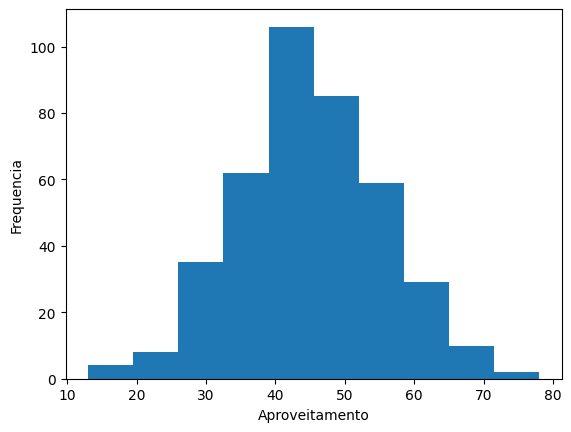

In [188]:
plt.hist(dfn['%'], bins=10)
plt.xlabel('Aproveitamento')
plt.ylabel('Frequencia')
plt.show()

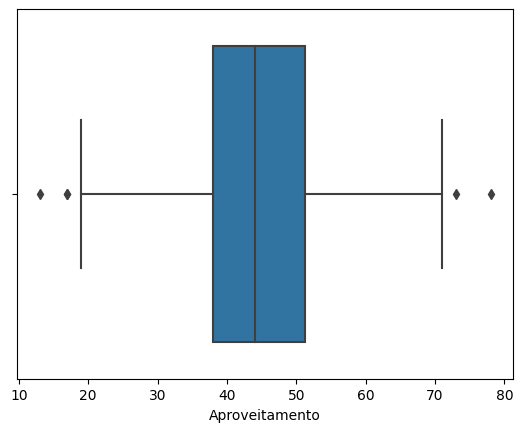

In [189]:
sns.boxplot(data=dfn, x='%')
plt.xlabel('Aproveitamento')
plt.show()

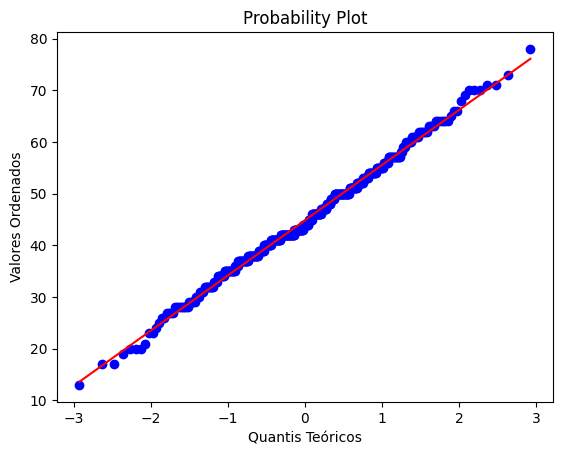

In [190]:
stats.probplot(dfn['%'], dist='norm', plot=plt)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Valores Ordenados')
plt.show()

In [191]:
ks_test = stats.kstest(dfn['%'], 'norm')
print('Kolmogorov-Smirnov Test:')
print('Statistic:', ks_test.statistic)
print('p-value:', ks_test.pvalue)

Kolmogorov-Smirnov Test:
Statistic: 1.0
p-value: 0.0


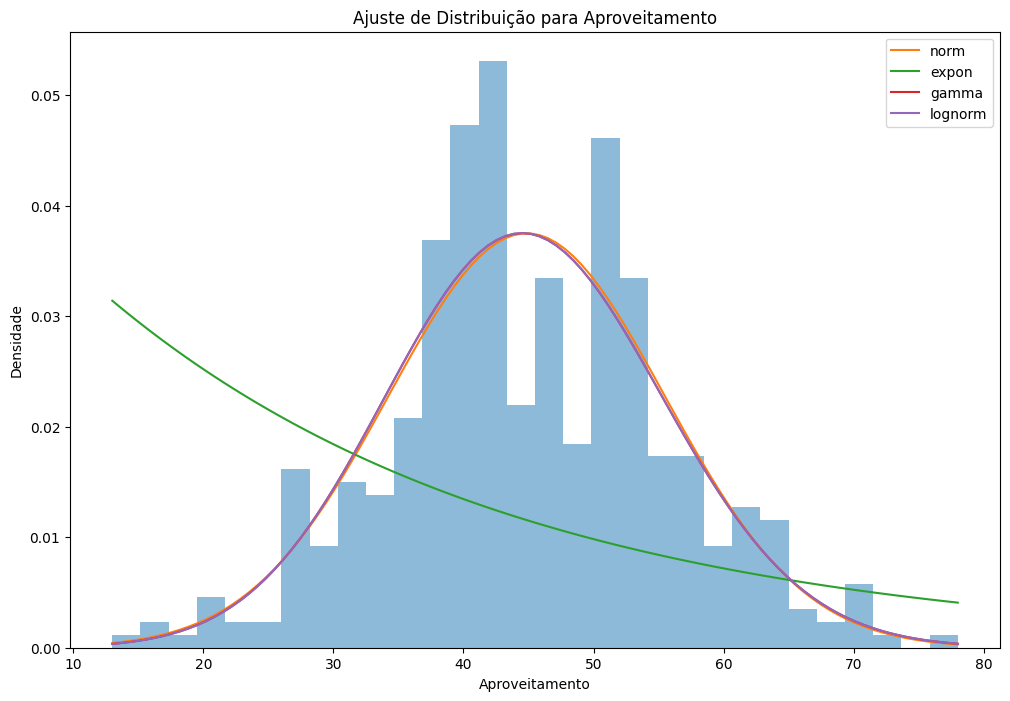

In [192]:
dist_names = ['norm', 'expon', 'gamma', 'lognorm']

best_fit_name = None
best_fit_params = {}
best_fit_distributions = []

for dist_name in dist_names:
    dist = getattr(stats, dist_name)
    params = dist.fit(dfn['%'])
    best_fit_distributions.append(dist)
    best_fit_params[dist_name] = params

plt.figure(figsize=(12, 8))
plt.hist(dfn['%'], bins=30, density=True, alpha=0.5)

for dist_name, params in best_fit_params.items():
    dist = best_fit_distributions[dist_names.index(dist_name)]
    x = np.linspace(dfn['%'].min(), dfn['%'].max(), 100)
    dist_instance = dist(*params[:-2], loc=params[-2], scale=params[-1])
    pdf = dist_instance.pdf(x)
    plt.plot(x, pdf, label=dist_name)

plt.xlabel('Aproveitamento')
plt.ylabel('Densidade')
plt.title('Ajuste de Distribuição para Aproveitamento')
plt.legend()
plt.show()

In [193]:
df.to_csv('brasileiro.csv',index=False)